<a href="https://colab.research.google.com/github/xiaohanyang1112/GK01/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir("/content/drive/MyDrive/Colab Notebooks/")

Mounted at /content/drive/


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sample 1_CSV_S&P1500_Raw Dataset_Data Analytics in Business Assignment_2021.csv')


In [3]:
df.isnull().sum()

Ticker                                 0
Name                                   0
Year                                   0
ISIN Number                            0
SIC Code                              81
GICS Industry                          0
Country or Territory of Domicile       0
Number of Employees                  203
Total Assets                          66
R&D Expense                         1015
R&D Expense Adjusted                1307
Operating Expenses R&D              1309
Cash and Cash Equivalents             66
Environmental Disclosure Score      1339
Social Disclosure Score              350
Governance Disclosure Score          147
Tobin's Q Ratio                      156
Return on Assets                     108
Return on Common Equity              286
Gross Margin                        1170
dtype: int64

In [4]:
df.dropna(subset=['Environmental Disclosure Score'],inplace=True)

In [5]:
df['first_two_numbers'] = df['SIC Code'].astype(str).str[:2]

df1 = df[df['first_two_numbers'].isin(['28', '35', '36', '37', '38', '49', '60', '63', '67', '73'])]

df1['first_two_numbers'].value_counts()

67    253
73    233
36    217
60    213
28    202
35    173
49    172
38    164
63    115
37    115
Name: first_two_numbers, dtype: int64

In [6]:
dict_sic = {
    28:'chemicals',#'Chemicals and Allied Products',
    35:'machinery',#'Industrial and Commercial Machinery and Computer Equipment',
    36:'electronic',#'Electronic & Other Electrical Equipment & Components',
    37:'transport',#'Transportation Equipment',
    38:'measurement',#'Measuring, Photographic, Medical, & Optical Goods, & Clocks',
    49:'energy',#Public facility
    60:'depository',#Finance, Insurance, Real Estate
    63:'insurance',#finance
    67:'holding',#Finance, Insurance, Real Estate
    73:'services', # Business service
}

df1['industry'] = df1['first_two_numbers'].astype(int).replace(dict_sic)
df1['industry'].value_counts()


<ipython-input-6-f68f728c4bfb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['industry'] = df1['first_two_numbers'].astype(int).replace(dict_sic)


holding        253
services       233
electronic     217
depository     213
chemicals      202
machinery      173
energy         172
measurement    164
insurance      115
transport      115
Name: industry, dtype: int64

In [7]:
finance_sample = df1[df1['first_two_numbers'].isin(['60', '63', '67', '73'])]
finance_sample.isnull().sum()


Ticker                                0
Name                                  0
Year                                  0
ISIN Number                           0
SIC Code                              0
GICS Industry                         0
Country or Territory of Domicile      0
Number of Employees                  18
Total Assets                          0
R&D Expense                         555
R&D Expense Adjusted                546
Operating Expenses R&D              546
Cash and Cash Equivalents             0
Environmental Disclosure Score        0
Social Disclosure Score               0
Governance Disclosure Score           0
Tobin's Q Ratio                       0
Return on Assets                      0
Return on Common Equity               9
Gross Margin                        566
first_two_numbers                     0
industry                              0
dtype: int64

In [8]:
finance_sample.shape

(814, 22)

In [9]:
manufacturing_sample = df1[df1['first_two_numbers'].isin(['35', '36', '37', '38'])]
manufacturing_sample.isnull().sum()

Ticker                               0
Name                                 0
Year                                 0
ISIN Number                          0
SIC Code                             0
GICS Industry                        0
Country or Territory of Domicile     0
Number of Employees                  5
Total Assets                         0
R&D Expense                          6
R&D Expense Adjusted                60
Operating Expenses R&D              60
Cash and Cash Equivalents            0
Environmental Disclosure Score       0
Social Disclosure Score              0
Governance Disclosure Score          0
Tobin's Q Ratio                      2
Return on Assets                     0
Return on Common Equity             17
Gross Margin                         0
first_two_numbers                    0
industry                             0
dtype: int64

In [10]:
manufacturing_sample.shape

(669, 22)

In [11]:
duplicates = manufacturing_sample.duplicated().sum()
duplicates

0

In [12]:
manufacturing_sample['GICS Industry'].value_counts()

453010    122
201060    116
351010     71
452030     66
201010     45
251010     39
452010     39
201040     32
452020     24
352030     23
251020     16
201050     12
101010     10
201020      9
252010      8
451030      7
202010      6
252020      6
252030      6
451020      3
201070      3
303010      3
501010      2
351030      1
Name: GICS Industry, dtype: int64

In [13]:
# Assuming gics_counts is your DataFrame
gics_counts = manufacturing_sample['GICS Industry'].value_counts()

# Create a function to categorize competitiveness
def categorize_competitiveness(count):
    if 1 <= count <= 3:
        return 'No competitor'
    elif 4 <= count <= 20:
        return 'Few competitors'
    elif 21 <= count <= 40:
        return 'Moderately competitive'
    else:
        return 'Highly competitive'

# Apply the function to create a new column 'Competitor Level'
manufacturing_sample['Competitor Level'] = manufacturing_sample['GICS Industry'].map(gics_counts).apply(categorize_competitiveness)
manufacturing_sample['competitor'] = manufacturing_sample['GICS Industry'].map(manufacturing_sample['GICS Industry'].value_counts())

manufacturing_sample


<ipython-input-13-deec7dc4d454>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturing_sample['Competitor Level'] = manufacturing_sample['GICS Industry'].map(gics_counts).apply(categorize_competitiveness)
<ipython-input-13-deec7dc4d454>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturing_sample['competitor'] = manufacturing_sample['GICS Industry'].map(manufacturing_sample['GICS Industry'].value_counts())


,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,...,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin,first_two_numbers,industry,Competitor Level,competitor
3,NXPI UW Equity,NXP Semiconductors NV,2016,NL0009538784,3674.0,453010,NL,40400.0,24898.000,1560.000,...,28.0702,26.7857,1.8811,0.7805,1.7817,42.8406,36,electronic,Highly competitive,122
7,BA UN Equity,Boeing Co/The,2016,US0970231058,3721.0,201010,US,150500.0,89997.000,4626.000,...,24.5614,55.3571,2.0585,5.4597,140.7718,15.4766,37,transport,Highly competitive,45
11,CAT UN Equity,Caterpillar Inc,2016,US1491231015,3531.0,201060,US,95400.0,74704.000,1853.000,...,38.5965,71.4286,1.5522,-0.0876,-0.4795,25.6818,35,machinery,Highly competitive,116
17,LII UN Equity,Lennox International Inc,2016,US5261071071,3585.0,201020,US,10600.0,1760.300,64.600,...,28.0702,55.3571,4.7180,16.1620,400.2882,29.5612,35,machinery,Few competitors,9
23,GE UN Equity,General Electric Co,2016,US3696043013,3600.0,201050,US,295000.0,365183.000,5480.000,...,38.5965,66.0714,1.5489,2.0579,9.3917,26.9068,36,electronic,Few competitors,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,GMED UN Equity,Globus Medical Inc,2018,US3795772082,3841.0,351010,US,1800.0,1300.670,55.496,...,8.7719,51.7857,3.3686,13.1537,14.5335,77.6414,38,measurement,Highly competitive,71
4490,DAN UN Equity,Dana Inc,2018,US2358252052,3714.0,251010,US,30900.0,5918.000,103.000,...,22.8070,58.9286,1.1059,7.3863,36.2171,14.2085,37,transport,Moderately competitive,39
4495,AAOI UQ Equity,Applied Optoelectronics Inc,2018,US03823U1025,3674.0,452010,US,2956.0,466.840,49.903,...,3.5088,51.7857,0.9498,-0.4666,-0.6480,32.8166,36,electronic,Moderately competitive,39
4501,WGO UN Equity,Winnebago Industries Inc,2018,US9746371007,3716.0,251020,US,4700.0,1051.805,NaN,...,24.5614,58.9286,1.6101,10.4750,20.9722,14.8667,37,transport,Few competitors,16


In [14]:
manufacturing_sample['Competitor Level'].value_counts()

Highly competitive        420
Moderately competitive    157
Few competitors            80
No competitor              12
Name: Competitor Level, dtype: int64

In [15]:
manufacturing_sample['first_three_numbers'] = manufacturing_sample['SIC Code'].astype(str).str[:3]
compet_df = manufacturing_sample[manufacturing_sample['first_three_numbers'] == '367']
compet_df.isnull().sum()

<ipython-input-15-eae650f748c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturing_sample['first_three_numbers'] = manufacturing_sample['SIC Code'].astype(str).str[:3]


Ticker                              0
Name                                0
Year                                0
ISIN Number                         0
SIC Code                            0
GICS Industry                       0
Country or Territory of Domicile    0
Number of Employees                 2
Total Assets                        0
R&D Expense                         0
R&D Expense Adjusted                0
Operating Expenses R&D              0
Cash and Cash Equivalents           0
Environmental Disclosure Score      0
Social Disclosure Score             0
Governance Disclosure Score         0
Tobin's Q Ratio                     0
Return on Assets                    0
Return on Common Equity             3
Gross Margin                        0
first_two_numbers                   0
industry                            0
Competitor Level                    0
competitor                          0
first_three_numbers                 0
dtype: int64

In [16]:
compet_df = compet_df.drop('first_two_numbers', axis=1)
compet_df = compet_df.drop('first_three_numbers', axis=1)
compet_df.isnull().sum()

Ticker                              0
Name                                0
Year                                0
ISIN Number                         0
SIC Code                            0
GICS Industry                       0
Country or Territory of Domicile    0
Number of Employees                 2
Total Assets                        0
R&D Expense                         0
R&D Expense Adjusted                0
Operating Expenses R&D              0
Cash and Cash Equivalents           0
Environmental Disclosure Score      0
Social Disclosure Score             0
Governance Disclosure Score         0
Tobin's Q Ratio                     0
Return on Assets                    0
Return on Common Equity             3
Gross Margin                        0
industry                            0
Competitor Level                    0
competitor                          0
dtype: int64

In [17]:
sample1 = compet_df[(compet_df['Year'] == 2016)][['Name','Number of Employees','Year','Total Assets',"Tobin's Q Ratio", 'R&D Expense', 'Cash and Cash Equivalents', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score','Return on Assets','Return on Common Equity','Gross Margin']]
sample1.shape

(38, 13)

In [18]:
sample2 = compet_df[(compet_df['Year'] == 2017)][['Name','Number of Employees','Year','Total Assets',"Tobin's Q Ratio", 'R&D Expense', 'Cash and Cash Equivalents', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score','Return on Assets','Return on Common Equity','Gross Margin']]
sample2.shape

(48, 13)

In [19]:
sample3 = compet_df[(compet_df['Year'] == 2018)][['Name','Number of Employees','Year','Total Assets', "Tobin's Q Ratio",'R&D Expense', 'Cash and Cash Equivalents', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score','Return on Assets','Return on Common Equity','Gross Margin']]
sample3.shape

(51, 13)

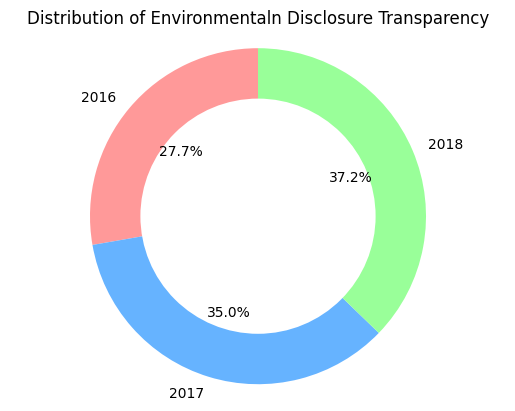

In [20]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([38, 48, 51])
mylabels = ["2016", "2017", "2018"]

colors = ["#ff9999", "#66b3ff", "#99ff99"]

plt.pie(y, labels=mylabels, autopct="%1.1f%%", startangle=90, colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")

plt.title("Distribution of Environmentaln Disclosure Transparency")

plt.show()


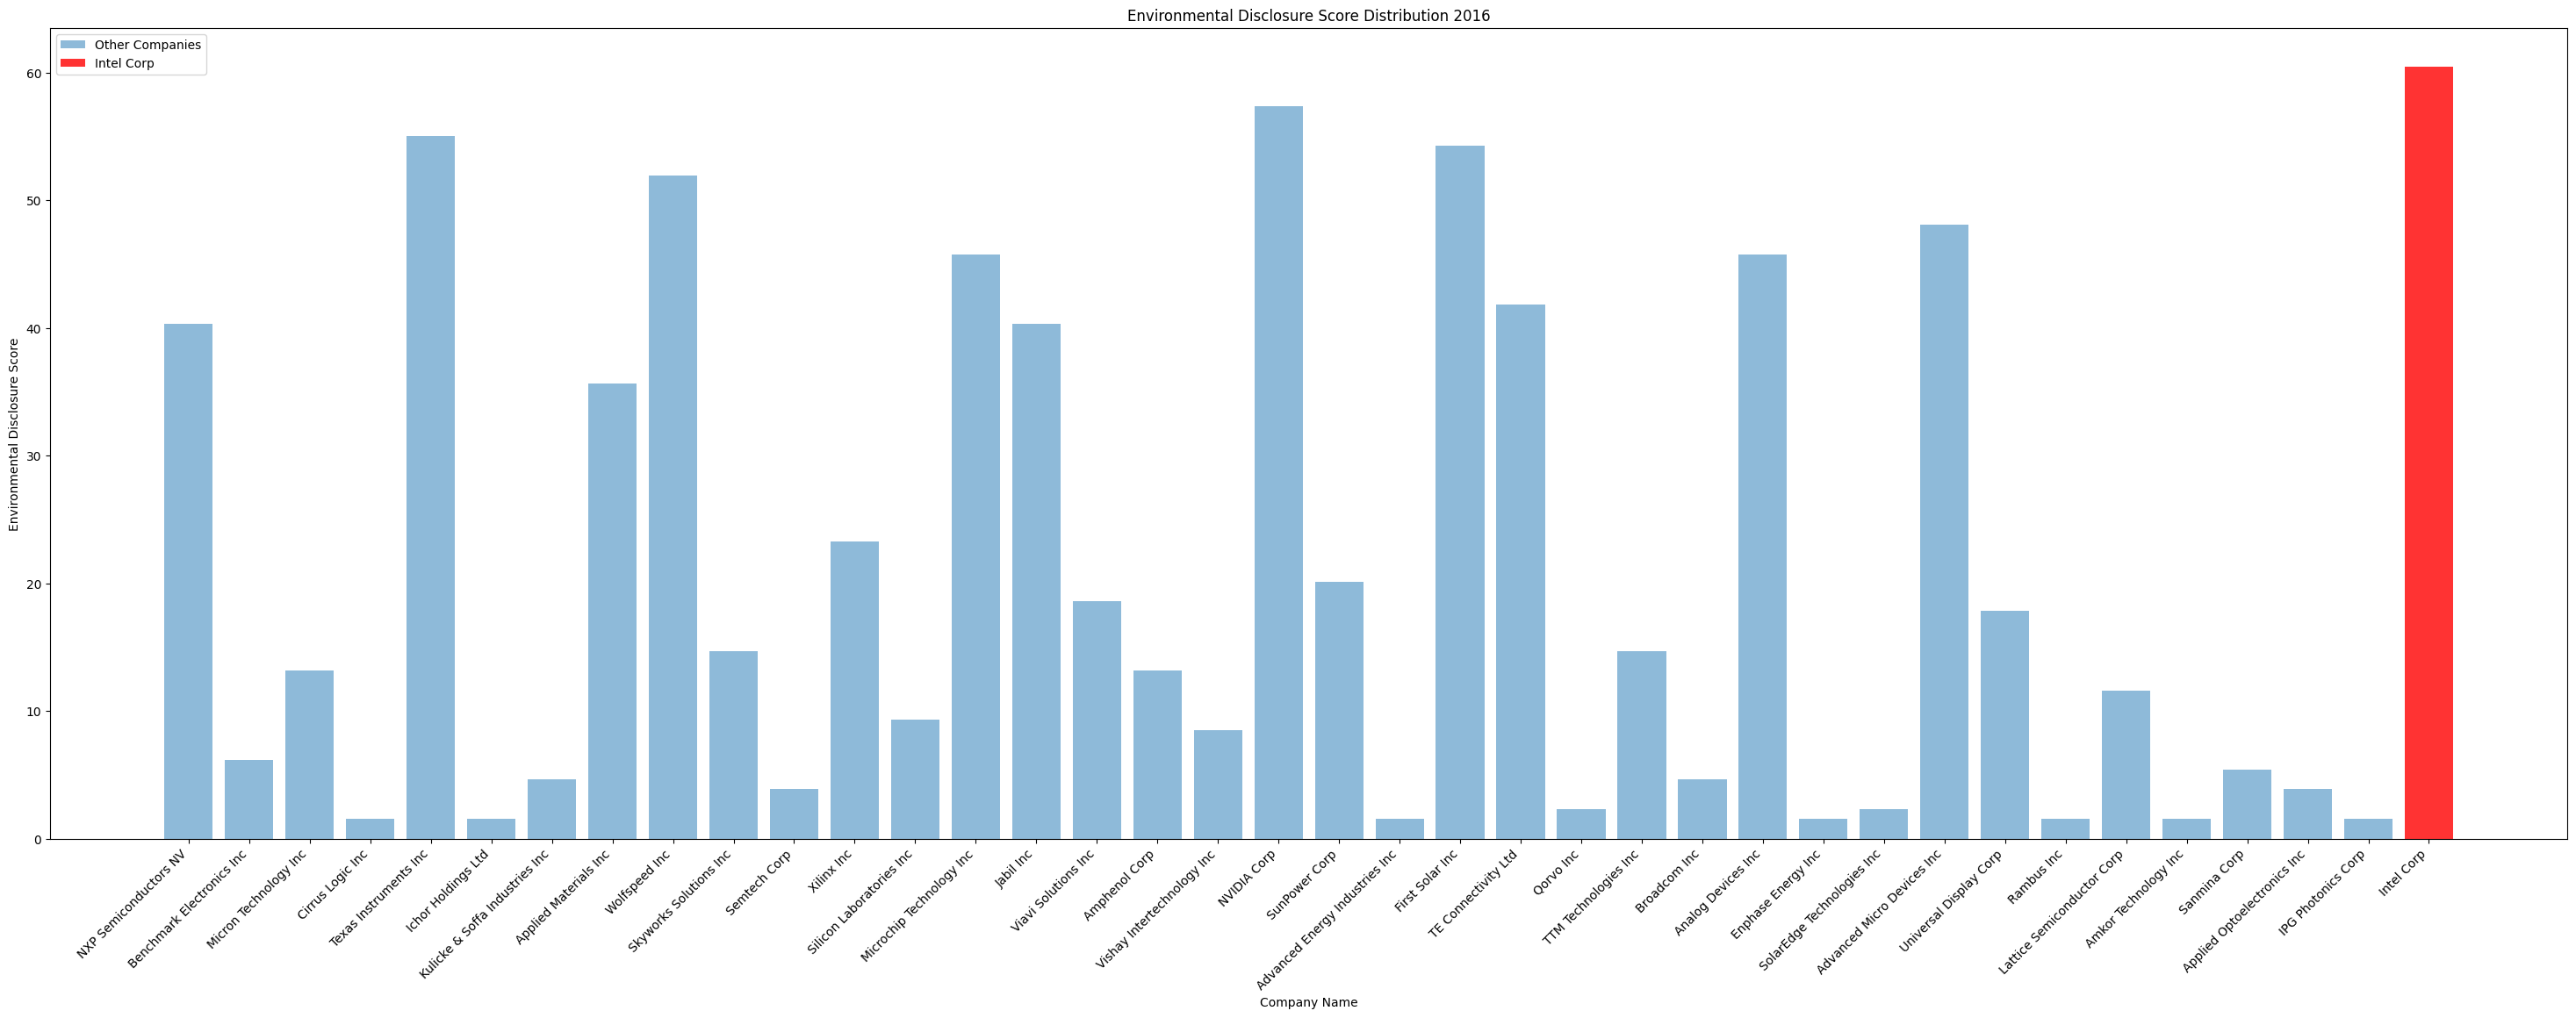

In [21]:
import matplotlib.pyplot as plt

selected_companies = sample1[(sample1['Name'] != 'Intel Corp')].copy()
intel_data = sample1[(sample1['Name'] == 'Intel Corp')]

plt.bar(selected_companies['Name'], selected_companies['Environmental Disclosure Score'], alpha=0.5, label='Other Companies')
plt.bar('Intel Corp', intel_data['Environmental Disclosure Score'].values, color='red', alpha=0.8, label='Intel Corp')

plt.xlabel('Company Name')
plt.ylabel('Environmental Disclosure Score')
plt.title('Environmental Disclosure Score Distribution 2016')

plt.xticks(rotation=45, ha='right')

plt.gcf().set_size_inches(len(selected_companies['Name']), 12)

plt.legend()

plt.show()




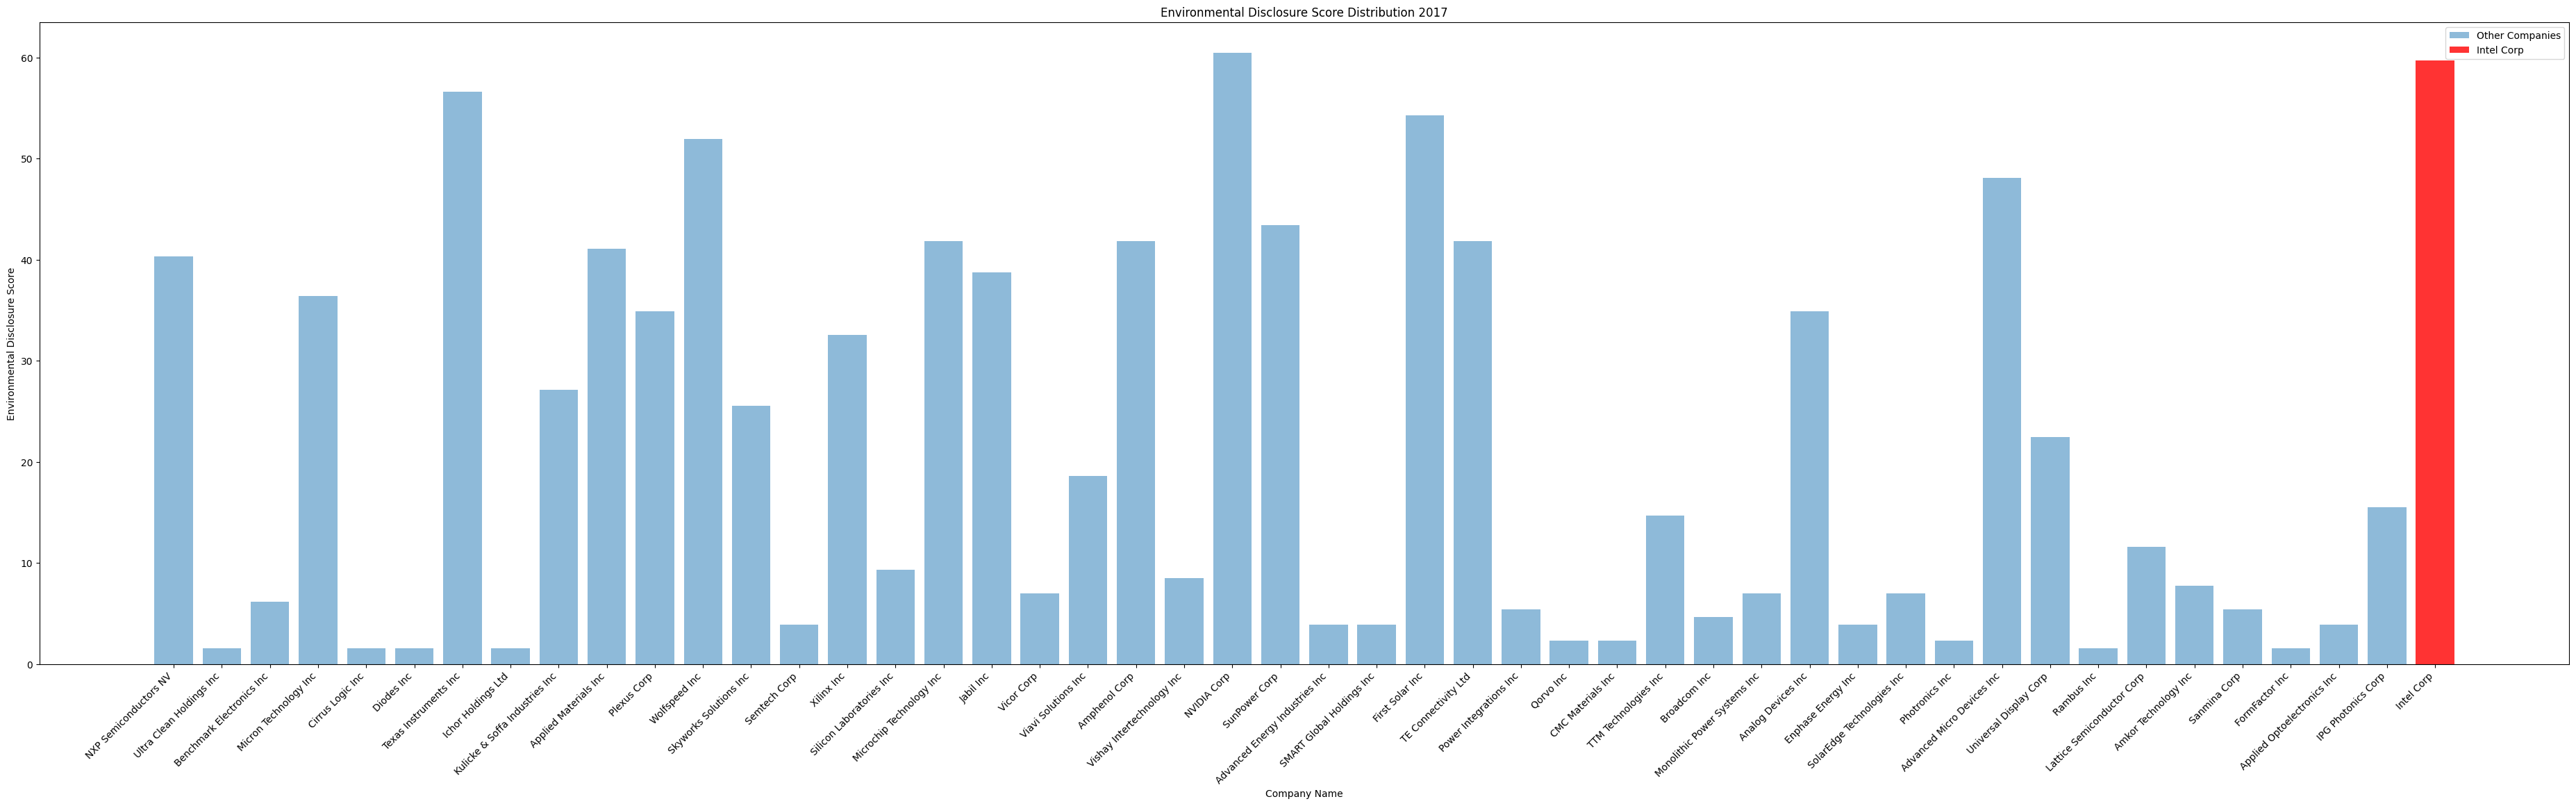

In [22]:
import matplotlib.pyplot as plt

selected_companies = sample2[(sample2['Name'] != 'Intel Corp')].copy()
intel_data = sample2[(sample2['Name'] == 'Intel Corp')]

plt.bar(selected_companies['Name'], selected_companies['Environmental Disclosure Score'], alpha=0.5, label='Other Companies')
plt.bar('Intel Corp', intel_data['Environmental Disclosure Score'].values, color='red', alpha=0.8, label='Intel Corp')

plt.xlabel('Company Name')
plt.ylabel('Environmental Disclosure Score')
plt.title('Environmental Disclosure Score Distribution 2017')

plt.xticks(rotation=45, ha='right')

plt.gcf().set_size_inches(len(selected_companies['Name']), 12)

plt.legend()

plt.show()

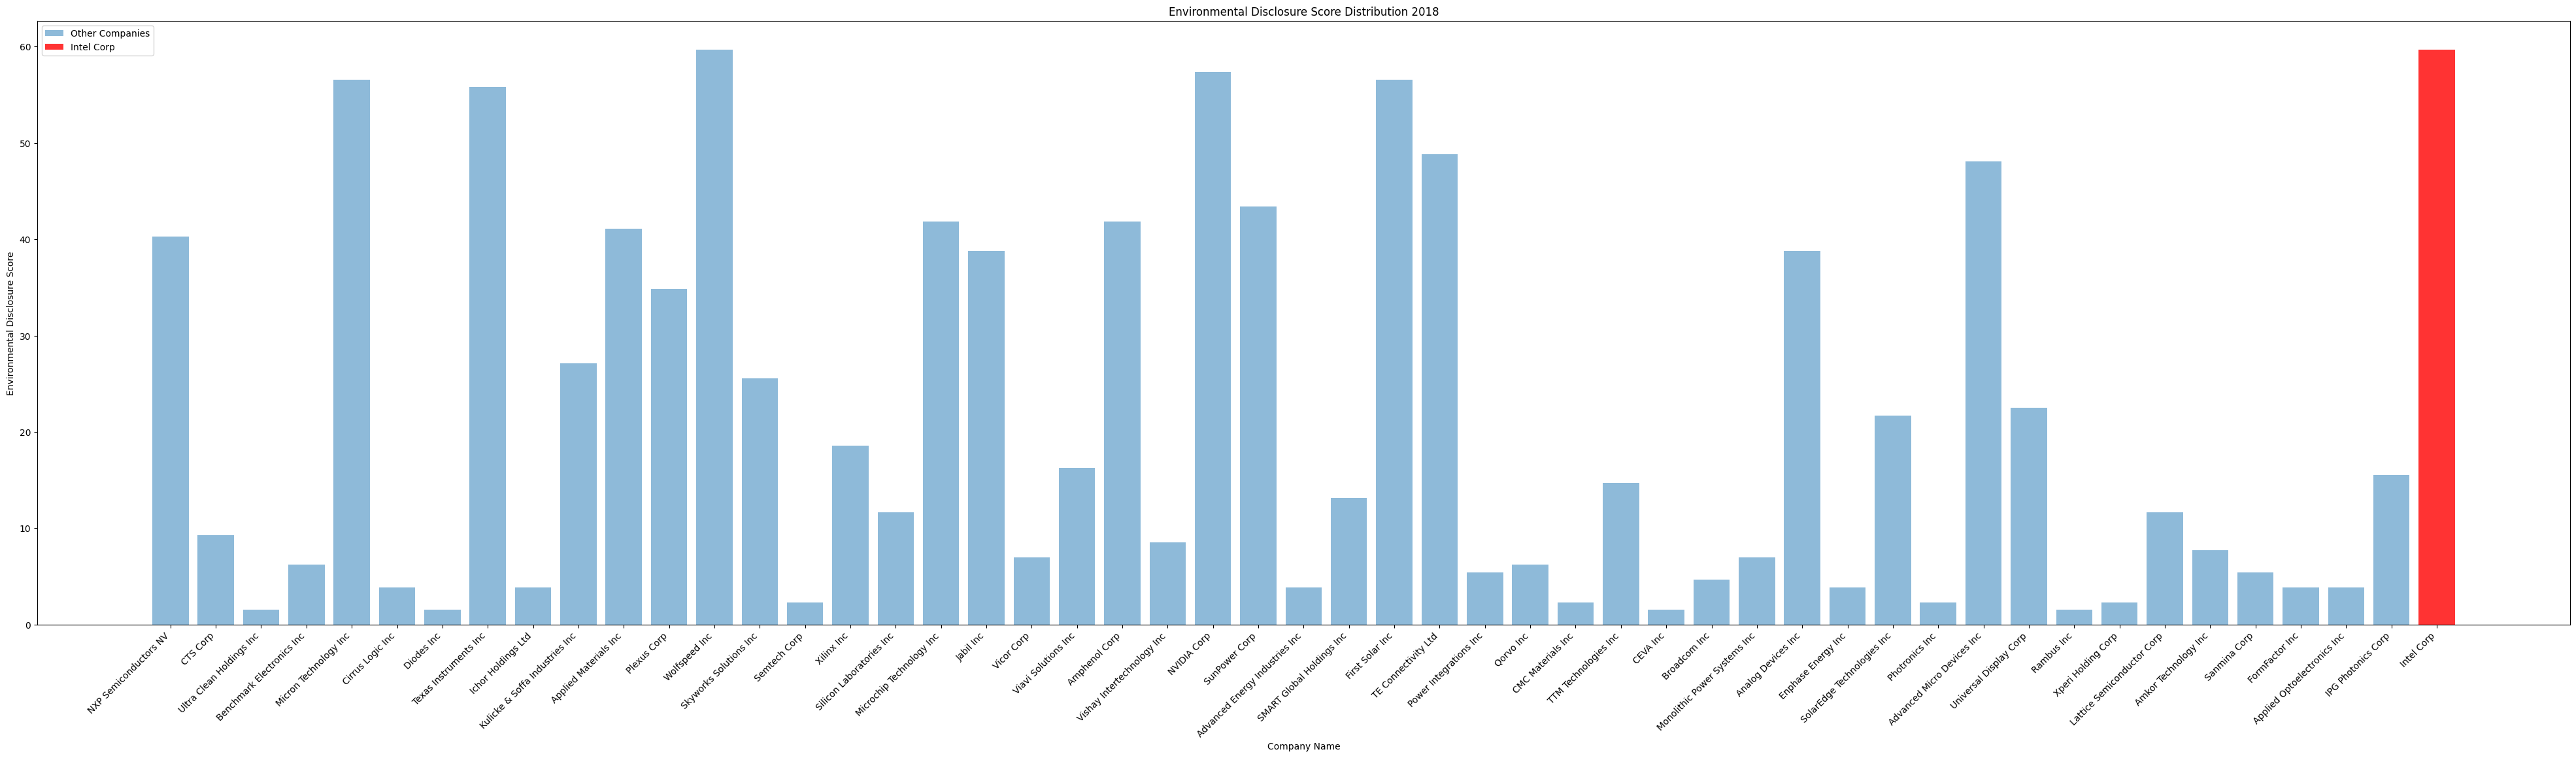

In [23]:
import matplotlib.pyplot as plt

selected_companies = sample3[(sample3['Name'] != 'Intel Corp')].copy()
intel_data = sample3[(sample3['Name'] == 'Intel Corp')]

plt.bar(selected_companies['Name'], selected_companies['Environmental Disclosure Score'], alpha=0.5, label='Other Companies')
plt.bar('Intel Corp', intel_data['Environmental Disclosure Score'].values, color='red', alpha=0.8, label='Intel Corp')

plt.xlabel('Company Name')
plt.ylabel('Environmental Disclosure Score')
plt.title('Environmental Disclosure Score Distribution 2018')

plt.xticks(rotation=45, ha='right')

plt.gcf().set_size_inches(len(selected_companies['Name']), 12)

plt.legend()

plt.show()

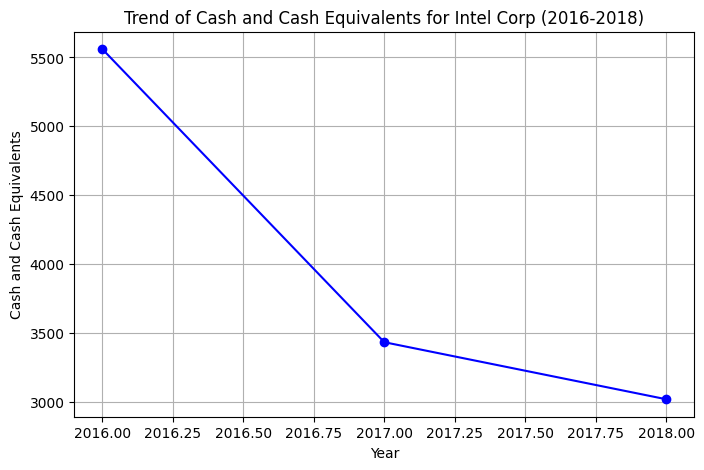

In [24]:
years = [2016, 2017, 2018]

scores = compet_df.loc[compet_df['Name'] == 'Intel Corp', 'Cash and Cash Equivalents']

plt.figure(figsize=(8, 5))

plt.plot(years, scores, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Cash and Cash Equivalents')
plt.title('Trend of Cash and Cash Equivalents for Intel Corp (2016-2018)')
plt.grid(True)
plt.show()


In [25]:
compet_df.describe()

,Year,SIC Code,GICS Industry,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin,competitor
count,137.000000,137.000000,137.000000,135.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,134.000000,137.000000,137.000000
mean,2017.094891,3673.985401,449058.759124,18261.014815,8955.875693,699.161051,698.543591,699.161372,997.318723,20.822733,24.382111,55.265891,2.466129,6.398669,4.037343,41.286218,103.948905
std,0.803331,1.723477,30302.107344,31864.371297,19664.246093,1980.380388,1980.085079,1980.380334,1517.254056,19.637402,14.029092,6.555138,1.806904,11.011400,53.700922,21.161344,29.729002
min,2016.000000,3670.000000,201040.000000,202.000000,163.576000,0.000000,0.000000,0.000000,17.764000,1.550400,3.508800,26.785700,0.724500,-40.997400,-315.619100,-17.211300,7.000000
25%,2016.000000,3674.000000,452030.000000,1521.500000,834.100000,49.144000,49.144000,49.144000,163.163000,3.876000,14.035100,51.785700,1.387600,0.667200,1.449975,23.223000,66.000000
50%,2017.000000,3674.000000,453010.000000,6600.000000,2500.076000,113.737000,113.737000,113.737000,425.881000,11.627900,22.807000,53.571400,1.929500,6.128700,12.447950,44.619200,122.000000
75%,2018.000000,3674.000000,453010.000000,19700.000000,7370.000000,529.300000,529.300000,529.300000,1078.000000,40.310100,33.333300,57.142900,2.917200,12.893000,22.435725,56.114200,122.000000
max,2018.000000,3679.000000,453010.000000,199000.000000,127963.000000,13543.000000,13543.000000,13543.000000,11204.000000,60.465100,61.403500,75.000000,13.453200,35.915700,88.647400,96.727400,122.000000


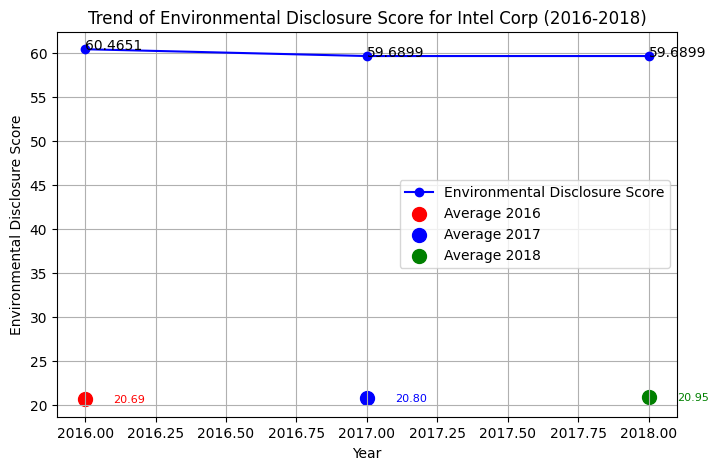

In [26]:
import matplotlib.pyplot as plt

years = [2016, 2017, 2018]

# Assuming 'compet_df' is your DataFrame
intel_data = compet_df.loc[compet_df['Name'] == 'Intel Corp', ["Year", "Environmental Disclosure Score"]]

plt.figure(figsize=(8, 5))

# Plot the trend
plt.plot(intel_data['Year'], intel_data['Environmental Disclosure Score'], marker='o', linestyle='-', color='b', label="Environmental Disclosure Score")

# Annotate each point with its value
for i, txt in enumerate(intel_data['Environmental Disclosure Score']):
    plt.annotate(txt, (intel_data['Year'].iloc[i], intel_data['Environmental Disclosure Score'].iloc[i]))

# Calculate and plot average spots with detailed numbers
averages = [sample1['Environmental Disclosure Score'].mean(), sample2["Environmental Disclosure Score"].mean(), sample3["Environmental Disclosure Score"].mean()]
colors = ['r', 'b', 'g']

for year, avg, color in zip(years, averages, colors):
    plt.scatter(year, avg, color=color, marker='o', s=100, label=f'Average {year}')
    plt.text(year + 0.1, avg, f'{avg:.2f}', color=color, fontsize=8, verticalalignment='center')

plt.xlabel('Year')
plt.ylabel('Environmental Disclosure Score')
plt.title('Trend of Environmental Disclosure Score for Intel Corp (2016-2018)')
plt.legend()
plt.grid(True)

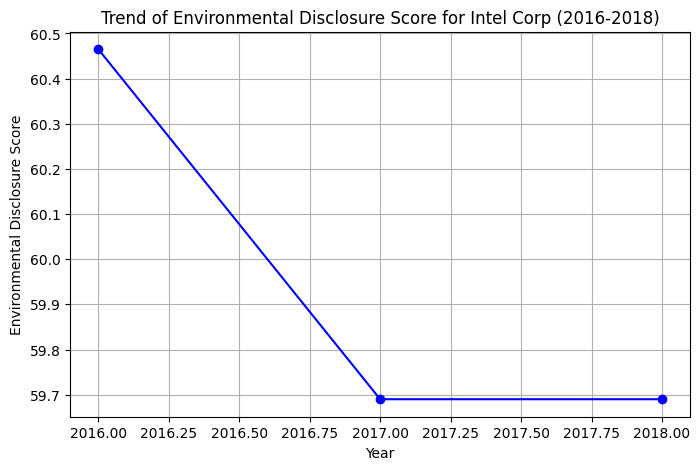

In [27]:
years = [2016, 2017, 2018]

scores = compet_df.loc[compet_df['Name'] == 'Intel Corp', 'Environmental Disclosure Score']

plt.figure(figsize=(8, 5))

plt.plot(years, scores, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Environmental Disclosure Score')
plt.title('Trend of Environmental Disclosure Score for Intel Corp (2016-2018)')
plt.grid(True)
plt.show()


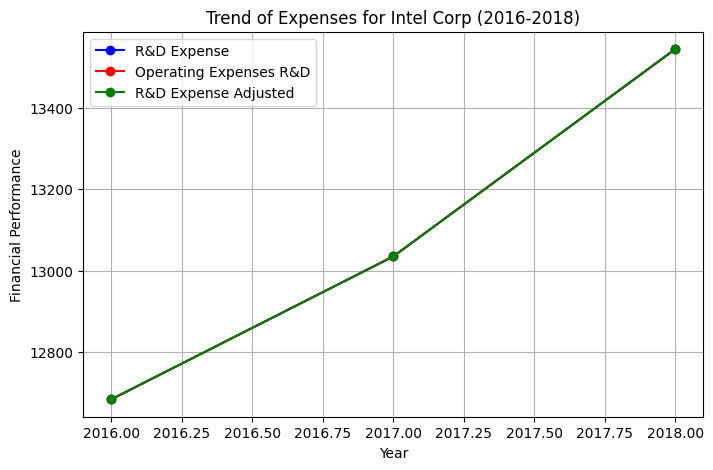

In [28]:
import matplotlib.pyplot as plt

years = [2016, 2017, 2018]

# Assuming 'R&D Expense' and 'R&D Expense Adjusted' are columns in the DataFrame
RDE = compet_df.loc[compet_df['Name'] == 'Intel Corp', 'R&D Expense']
OCCE = compet_df.loc[compet_df['Name'] == 'Intel Corp', 'Operating Expenses R&D']
RDEA = compet_df.loc[compet_df['Name'] == 'Intel Corp', 'R&D Expense Adjusted']

plt.figure(figsize=(8, 5))

plt.plot(years, RDE, marker='o', linestyle='-', color='b', label='R&D Expense')
plt.plot(years, OCCE, marker='o', linestyle='-', color='r', label='Operating Expenses R&D')
plt.plot(years, RDEA, marker='o', linestyle='-', color='g', label='R&D Expense Adjusted')

plt.xlabel('Year')
plt.ylabel('Financial Performance')
plt.title('Trend of Expenses for Intel Corp (2016-2018)')
plt.legend()
plt.grid(True)
plt.show()


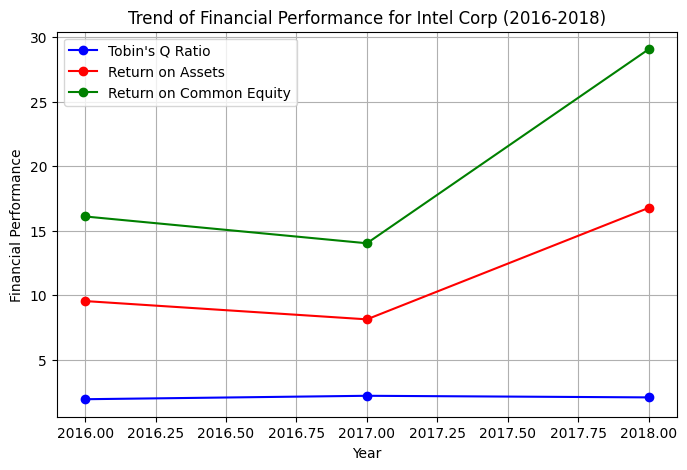

In [29]:
import matplotlib.pyplot as plt

years = [2016, 2017, 2018]

# Assuming 'R&D Expense' and 'R&D Expense Adjusted' are columns in the DataFrame
TQR = compet_df.loc[compet_df['Name'] == 'Intel Corp', "Tobin's Q Ratio"]
ROA = compet_df.loc[compet_df['Name'] == 'Intel Corp', 'Return on Assets']
ROCE = compet_df.loc[compet_df['Name'] == 'Intel Corp', 'Return on Common Equity']

plt.figure(figsize=(8, 5))

plt.plot(years, TQR, marker='o', linestyle='-', color='b', label="Tobin's Q Ratio")
plt.plot(years, ROA, marker='o', linestyle='-', color='r', label='Return on Assets')
plt.plot(years, ROCE, marker='o', linestyle='-', color='g', label='Return on Common Equity')

plt.xlabel('Year')
plt.ylabel('Financial Performance')
plt.title('Trend of Financial Performance for Intel Corp (2016-2018)')
plt.legend()
plt.grid(True)
plt.show()

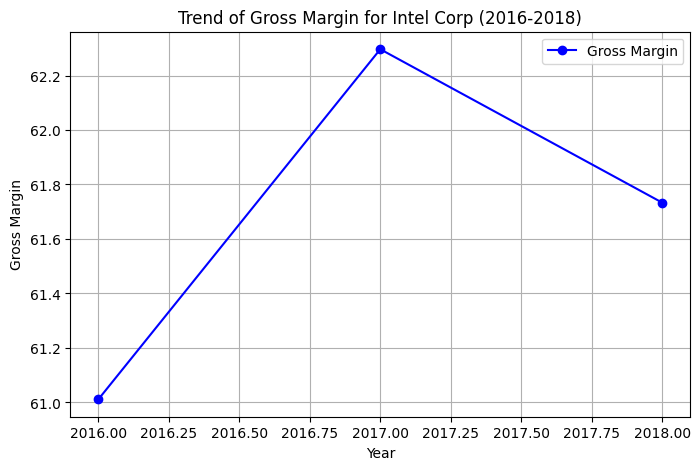

In [30]:
import matplotlib.pyplot as plt

years = [2016, 2017, 2018]

GM = compet_df.loc[compet_df['Name'] == 'Intel Corp', "Gross Margin"]

plt.figure(figsize=(8, 5))

plt.plot(years, GM, marker='o', linestyle='-', color='b', label="Gross Margin")

plt.xlabel('Year')
plt.ylabel('Gross Margin')
plt.title('Trend of Gross Margin for Intel Corp (2016-2018)')
plt.legend()
plt.grid(True)
plt.show()

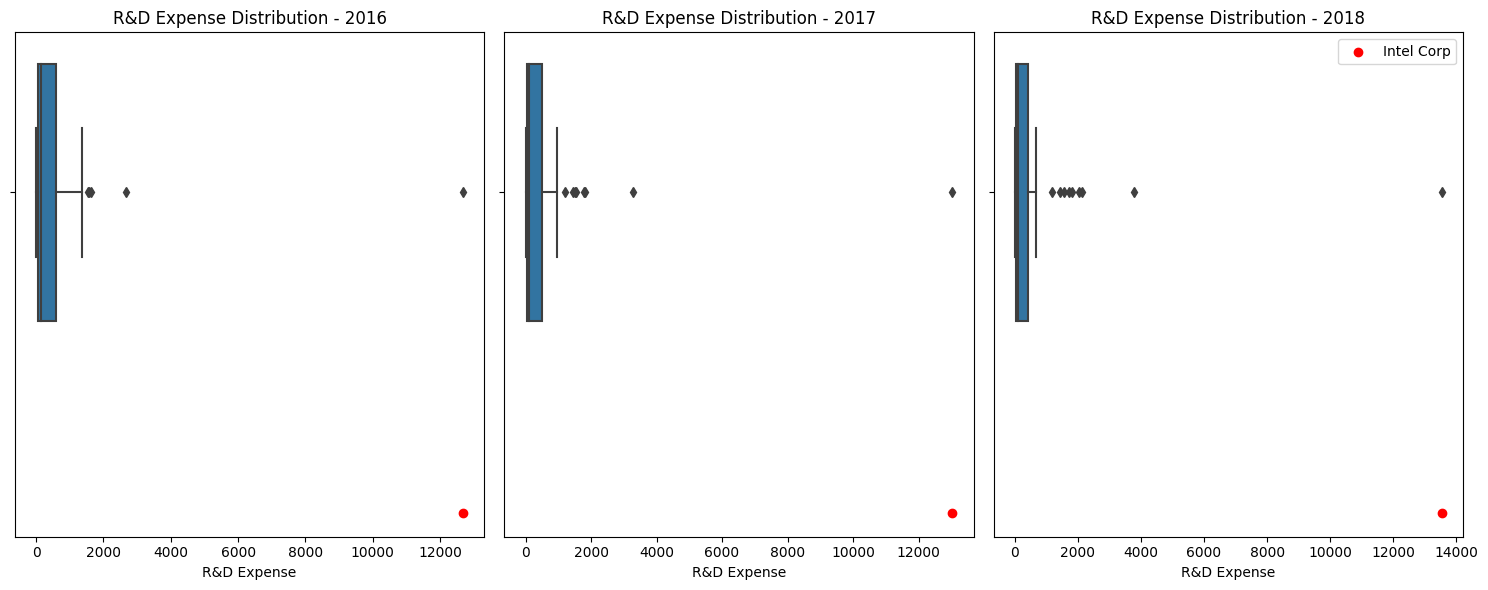

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

years = [2016, 2017, 2018]

fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 6), sharey=True)

for i, year in enumerate(years):

    year_data = compet_df[compet_df['Year'] == year]

    sns.boxplot(x='R&D Expense', data=year_data, ax=axes[i])

    intel_data_year = year_data[year_data['Name'] == 'Intel Corp']
    axes[i].scatter(x=intel_data_year['R&D Expense'], y=[1] * len(intel_data_year),
                    color='red', marker='o', label='Intel Corp')

    axes[i].set_xlabel('R&D Expense')
    axes[i].set_title(f'R&D Expense Distribution - {year}')

axes[0].set_ylabel('')

axes[-1].legend()

plt.tight_layout()

plt.show()


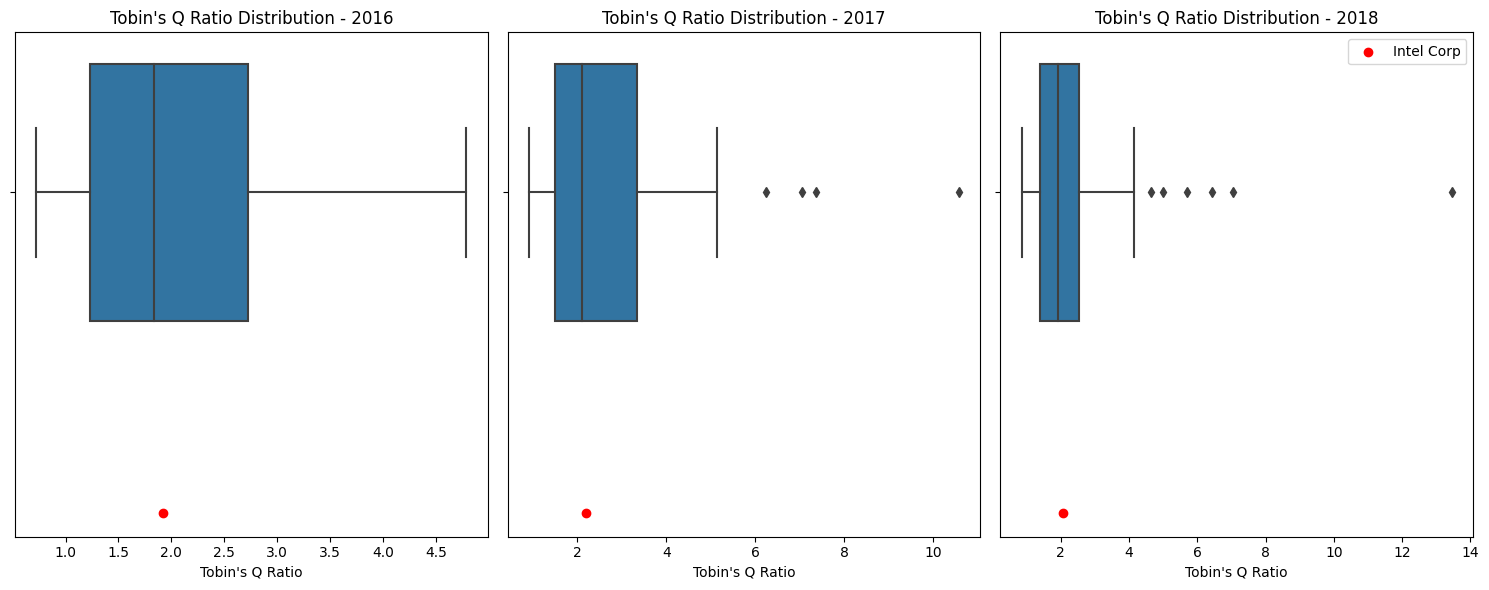

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

years = [2016, 2017, 2018]

fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 6), sharey=True)

for i, year in enumerate(years):

    year_data = compet_df[compet_df['Year'] == year]

    sns.boxplot(x="Tobin's Q Ratio", data=year_data, ax=axes[i])

    intel_data_year = year_data[year_data['Name'] == 'Intel Corp']
    axes[i].scatter(x=intel_data_year["Tobin's Q Ratio"], y=[1] * len(intel_data_year),
                    color='red', marker='o', label='Intel Corp')

    axes[i].set_xlabel("Tobin's Q Ratio")
    axes[i].set_title(f"Tobin's Q Ratio Distribution - {year}")

axes[0].set_ylabel('')

axes[-1].legend()

plt.tight_layout()

plt.show()

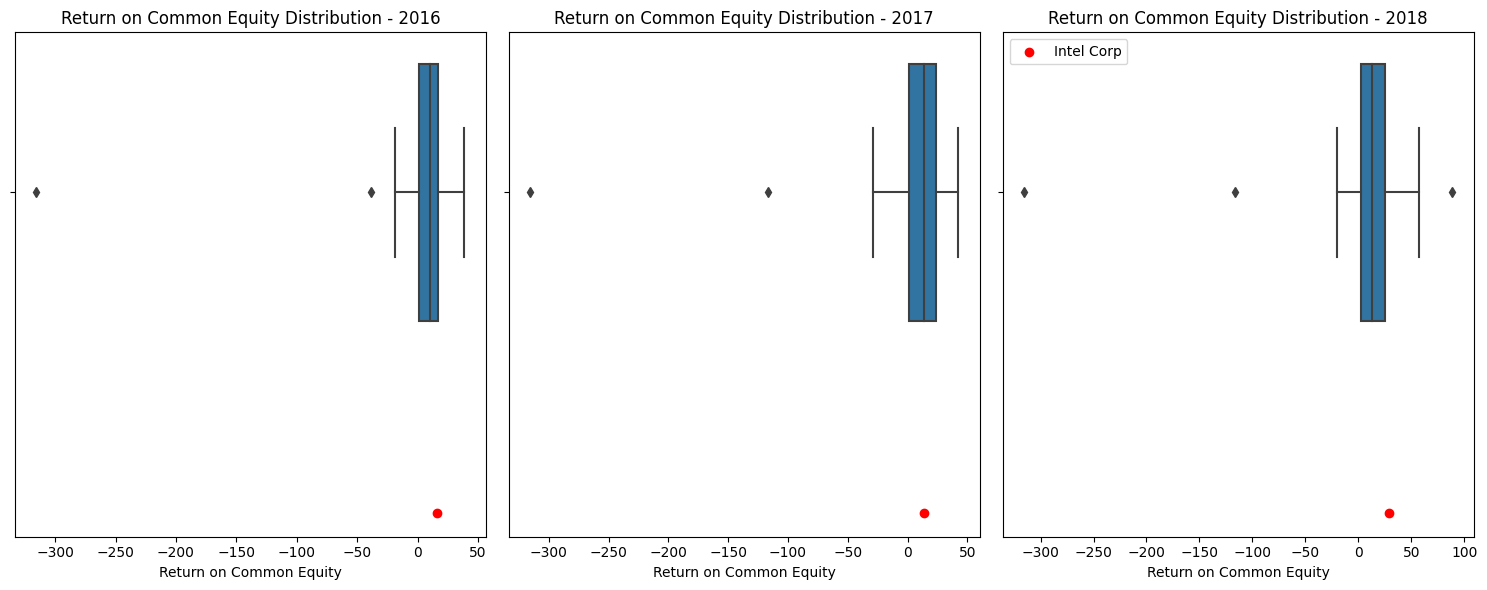

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

years = [2016, 2017, 2018]

fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 6), sharey=True)

for i, year in enumerate(years):

    year_data = compet_df[compet_df['Year'] == year]

    sns.boxplot(x='Return on Common Equity', data=year_data, ax=axes[i])

    intel_data_year = year_data[year_data['Name'] == 'Intel Corp']
    axes[i].scatter(x=intel_data_year['Return on Common Equity'], y=[1] * len(intel_data_year),
                    color='red', marker='o', label='Intel Corp')

    axes[i].set_xlabel('Return on Common Equity')
    axes[i].set_title(f'Return on Common Equity Distribution - {year}')

axes[0].set_ylabel('')

axes[-1].legend()

plt.tight_layout()

plt.show()

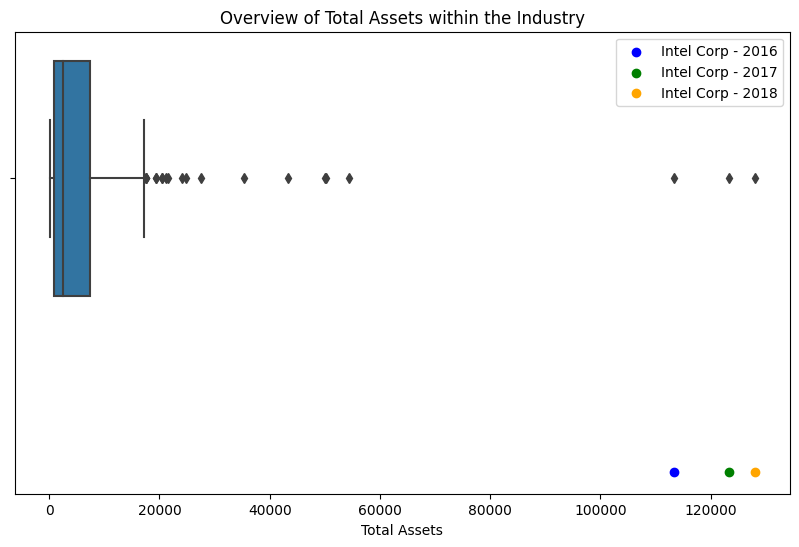

In [34]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Total Assets', data=compet_df)

for year, color in zip([2016, 2017, 2018], ['blue', 'green', 'orange']):
    intel_data_year = compet_df[(compet_df['Name'] == 'Intel Corp') & (compet_df['Year'] == year)]
    plt.scatter(x=intel_data_year['Total Assets'], y=[1] * len(intel_data_year), color=color, marker='o', label=f'Intel Corp - {year}')


plt.xlabel('Total Assets')
plt.title('Overview of Total Assets within the Industry')
plt.legend()

plt.show()

In [35]:
sample1.describe()

,Number of Employees,Year,Total Assets,Tobin's Q Ratio,R&D Expense,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Return on Assets,Return on Common Equity,Gross Margin
count,37.000000,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,36.000000,38.000000
mean,20132.837838,2016.0,9569.785684,2.096134,760.703237,949.763526,20.685445,23.453355,54.793221,4.252884,0.015008,40.700432
std,30576.447584,0.0,19855.915236,1.054187,2079.132556,1223.591337,20.122051,13.768328,7.275622,11.741010,56.255961,20.942592
min,202.000000,2016.0,163.576000,0.724500,0.000000,17.764000,1.550400,3.508800,26.785700,-40.997400,-315.619100,7.421800
25%,2389.000000,2016.0,1007.294000,1.232550,54.737750,179.547250,3.876000,14.035100,51.785700,-0.125650,0.818775,22.290600
50%,8900.000000,2016.0,3473.111000,1.835550,147.972000,525.861500,13.178300,22.807000,51.785700,5.135550,10.190600,42.256350
75%,27900.000000,2016.0,7820.208500,2.720600,585.722750,1071.500000,40.310100,29.386000,56.696450,10.510600,17.251825,57.306150
max,138000.000000,2016.0,113327.000000,4.785800,12685.000000,5560.000000,60.465100,57.894700,75.000000,26.276600,38.878400,83.854600


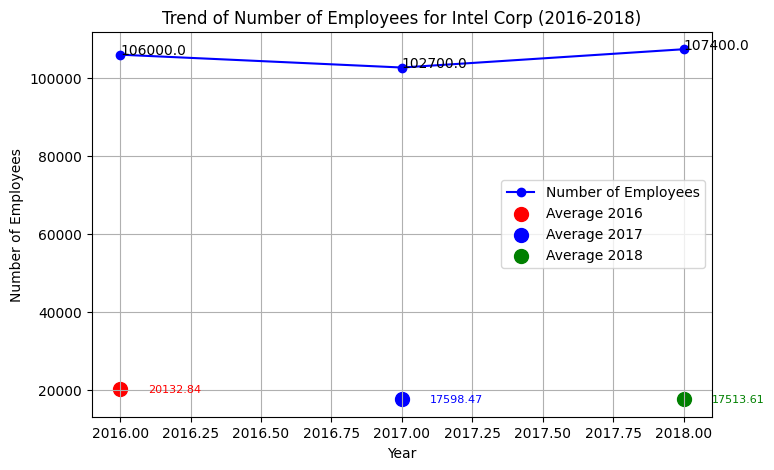

In [36]:
import matplotlib.pyplot as plt

years = [2016, 2017, 2018]

# Assuming 'compet_df' is your DataFrame
intel_data = compet_df.loc[compet_df['Name'] == 'Intel Corp', ["Year", "Number of Employees"]]

plt.figure(figsize=(8, 5))

# Plot the trend
plt.plot(intel_data['Year'], intel_data['Number of Employees'], marker='o', linestyle='-', color='b', label="Number of Employees")

# Annotate each point with its value
for i, txt in enumerate(intel_data['Number of Employees']):
    plt.annotate(txt, (intel_data['Year'].iloc[i], intel_data['Number of Employees'].iloc[i]))

# Calculate and plot average spots with detailed numbers
averages = [sample1['Number of Employees'].mean(), sample2['Number of Employees'].mean(), sample3['Number of Employees'].mean()]
colors = ['r', 'b', 'g']

for year, avg, color in zip(years, averages, colors):
    plt.scatter(year, avg, color=color, marker='o', s=100, label=f'Average {year}')
    plt.text(year + 0.1, avg, f'{avg:.2f}', color=color, fontsize=8, verticalalignment='center')

plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.title('Trend of Number of Employees for Intel Corp (2016-2018)')
plt.legend()
plt.grid(True)
plt.show()


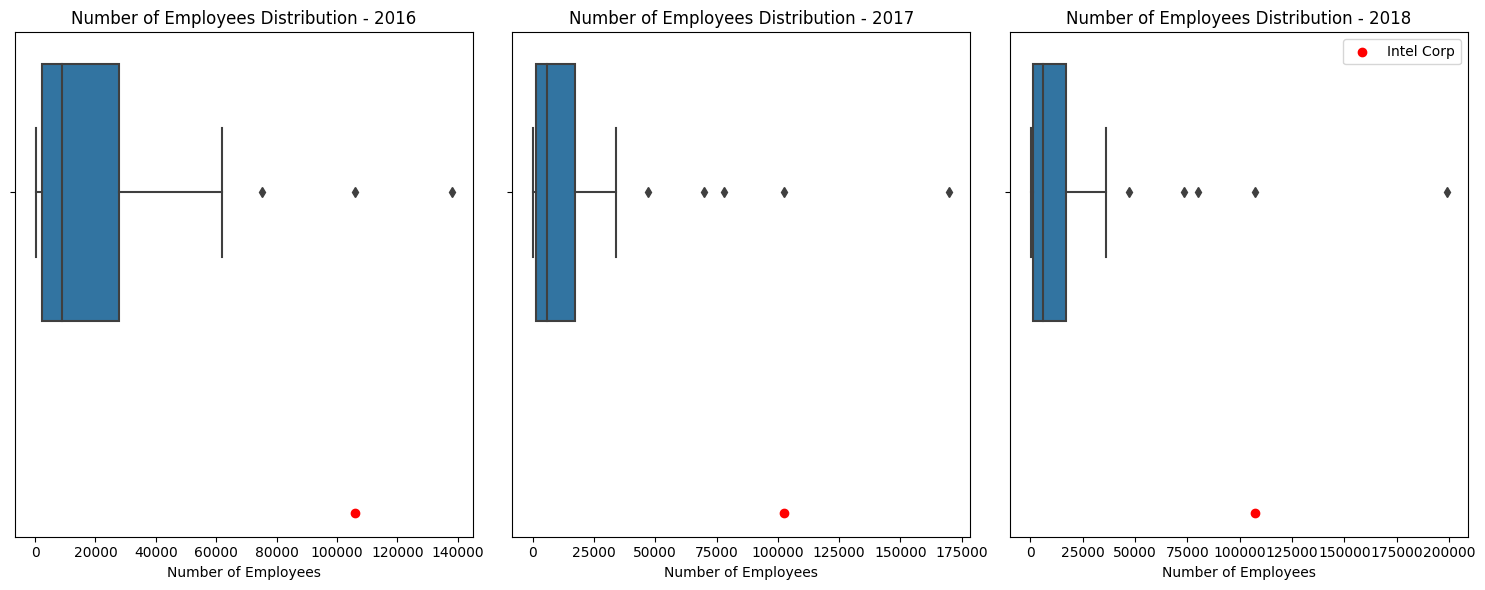

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

years = [2016, 2017, 2018]

fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 6), sharey=True)

for i, year in enumerate(years):

    year_data = compet_df[compet_df['Year'] == year]

    sns.boxplot(x='Number of Employees', data=year_data, ax=axes[i])

    intel_data_year = year_data[year_data['Name'] == 'Intel Corp']
    axes[i].scatter(x=intel_data_year['Number of Employees'], y=[1] * len(intel_data_year),
                    color='red', marker='o', label='Intel Corp')

    axes[i].set_xlabel('Number of Employees')
    axes[i].set_title(f'Number of Employees Distribution - {year}')

axes[0].set_ylabel('')

axes[-1].legend()

plt.tight_layout()

plt.show()

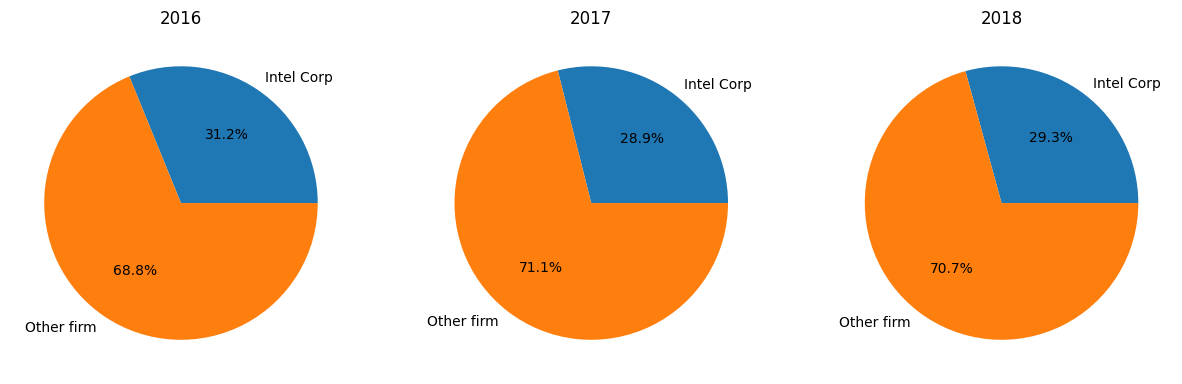

In [38]:
import matplotlib.pyplot as plt

mylabels = ['Intel Corp', 'Other firm']

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Sample 1
intel_corp1 = sample1[sample1['Name'] == 'Intel Corp']['Total Assets'].iloc[0]
other_corp1 = sample1[sample1['Name'] != 'Intel Corp']['Total Assets'].sum()
y1 = [intel_corp1, other_corp1]
axes[0].pie(y1, labels=mylabels, autopct="%.1f%%")
axes[0].set_title('2016')

# Sample 2
intel_corp2 = sample2[sample2['Name'] == 'Intel Corp']['Total Assets'].iloc[0]
other_corp2 = sample2[sample2['Name'] != 'Intel Corp']['Total Assets'].sum()
y2 = [intel_corp2, other_corp2]
axes[1].pie(y2, labels=mylabels, autopct="%.1f%%")
axes[1].set_title('2017')

# Sample 3
intel_corp3 = sample3[sample3['Name'] == 'Intel Corp']['Total Assets'].iloc[0]
other_corp3 = sample3[sample3['Name'] != 'Intel Corp']['Total Assets'].sum()
y3 = [intel_corp3, other_corp3]
axes[2].pie(y3, labels=mylabels, autopct="%.1f%%")
axes[2].set_title('2018')

plt.show()



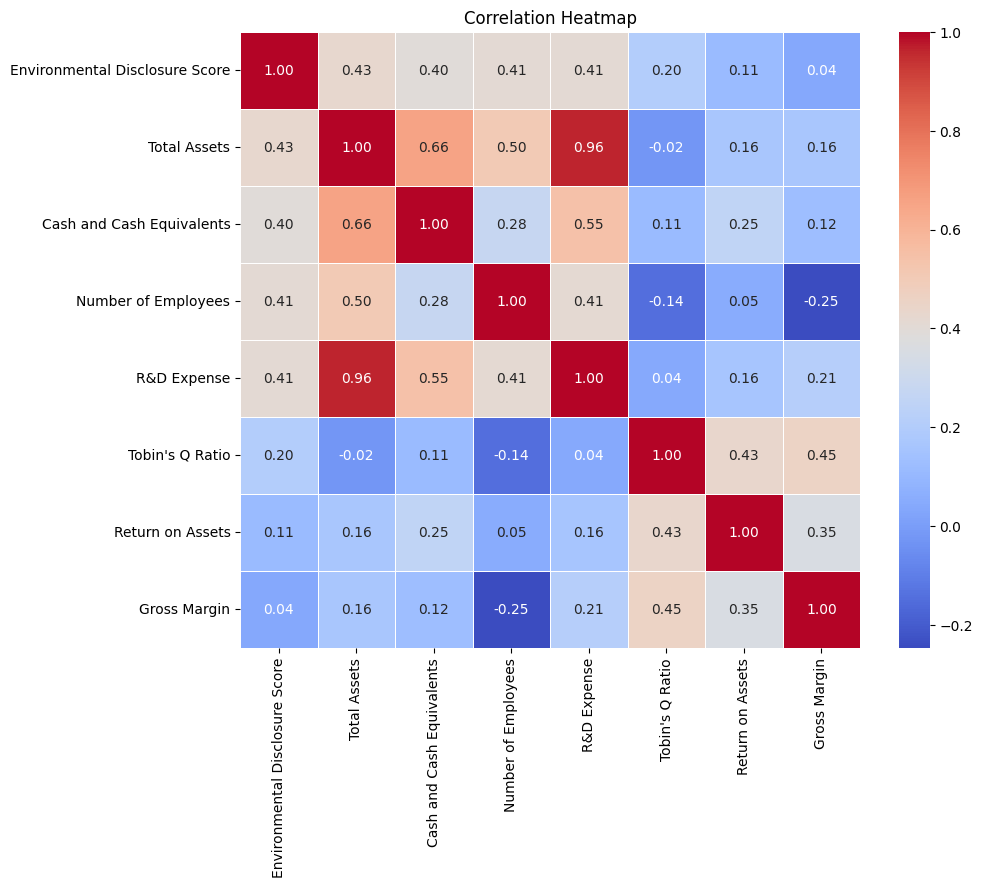

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_data = compet_df[['Environmental Disclosure Score','Total Assets','Cash and Cash Equivalents', 'Number of Employees', 'R&D Expense', 'Tobin\'s Q Ratio', 'Return on Assets', 'Gross Margin']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


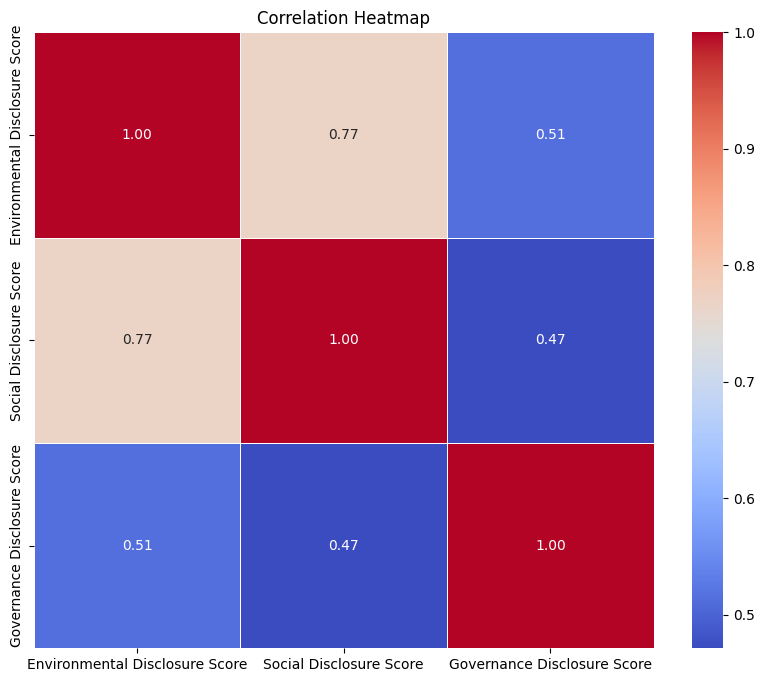

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_data = compet_df[['Environmental Disclosure Score','Social Disclosure Score','Governance Disclosure Score']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

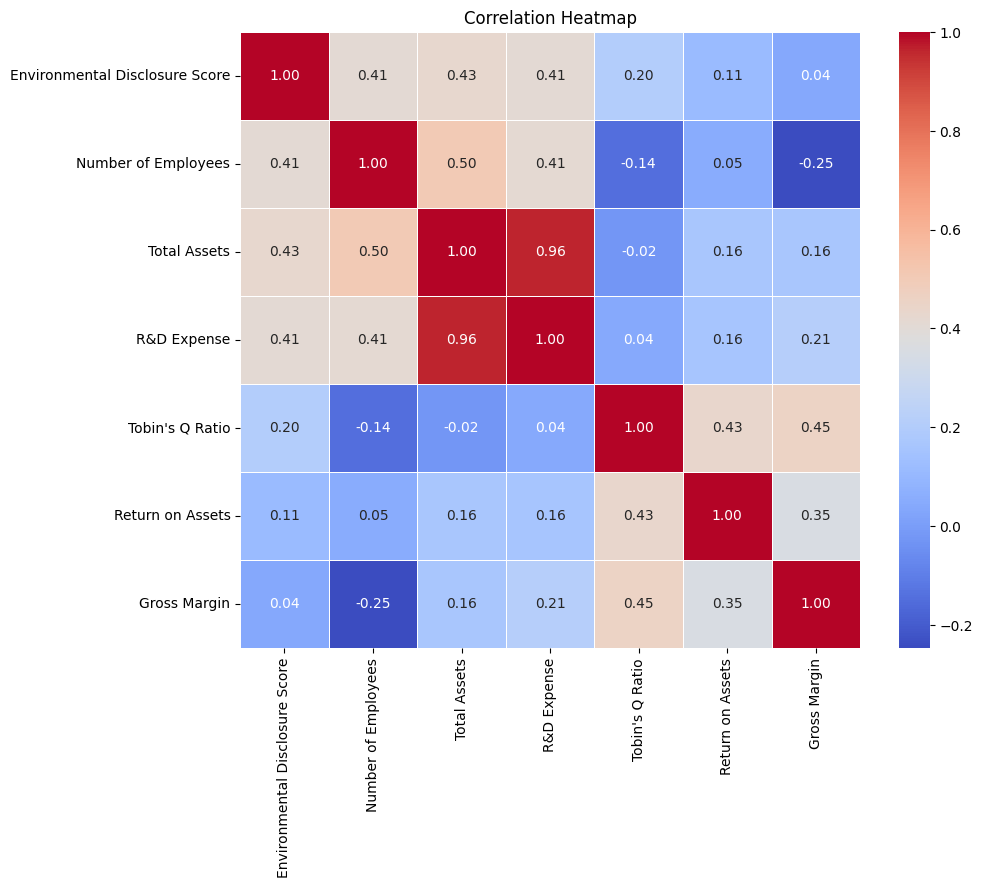

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_data = compet_df[['Environmental Disclosure Score','Number of Employees', 'Total Assets', 'R&D Expense', 'Tobin\'s Q Ratio', 'Return on Assets', 'Gross Margin']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


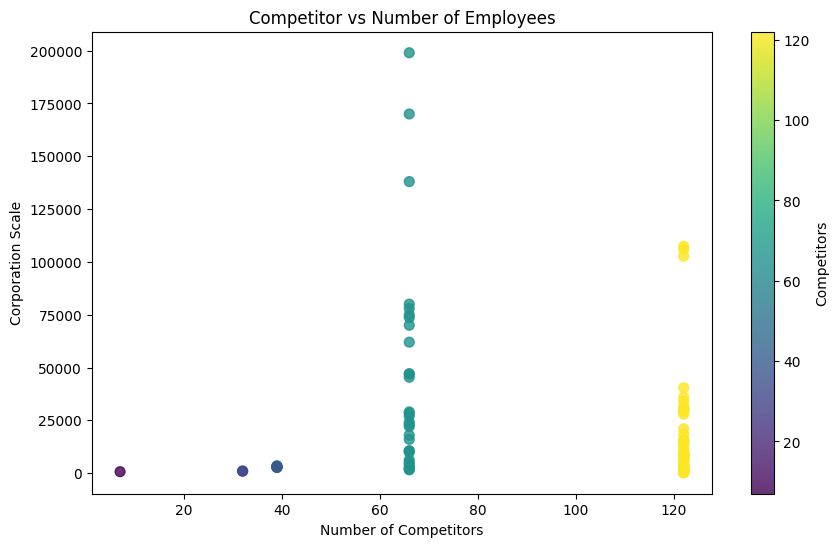

In [42]:
import matplotlib.cm as cm

# Scatter plot with competitor count as marker size and colors representing different degrees of competitors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(compet_df['competitor'], compet_df['Number of Employees'], s=50, c=compet_df['competitor'], cmap='viridis', alpha=0.8)

# Add labels and title
plt.title('Competitor vs Number of Employees')
plt.xlabel('Number of Competitors')
plt.ylabel('Corporation Scale')

# Add colorbar to show the mapping of degrees of competitors
cbar = plt.colorbar(scatter)
cbar.set_label('Competitors')

plt.show()


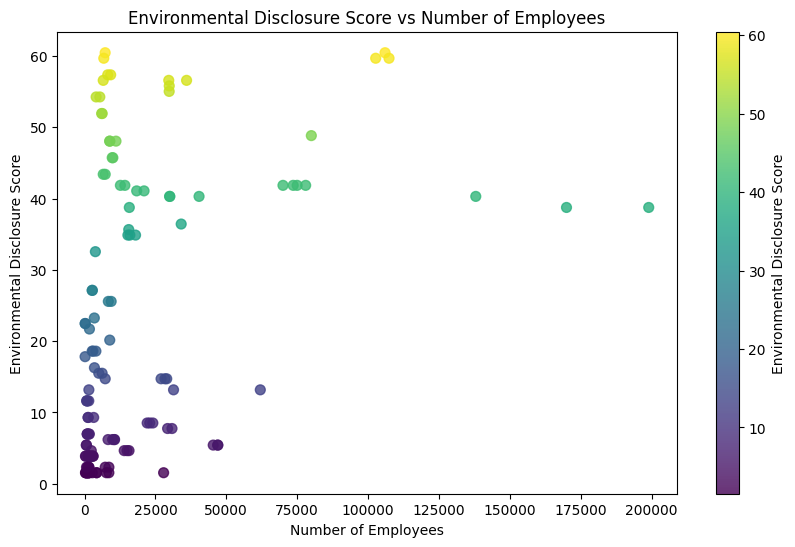

In [43]:
import matplotlib.cm as cm

# Scatter plot with competitor count as marker size and colors representing different degrees of competitors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(compet_df['Number of Employees'],compet_df['Environmental Disclosure Score'],s=50, c=compet_df['Environmental Disclosure Score'], cmap='viridis', alpha=0.8)

# Add labels and title
plt.title('Environmental Disclosure Score vs Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Environmental Disclosure Score')

# Add colorbar to show the mapping of degrees of competitors
cbar = plt.colorbar(scatter)
cbar.set_label('Environmental Disclosure Score')

plt.show()

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from plotnine import *
pd.set_option('mode.chained_assignment',None)

In [45]:
pip install scikit-learn


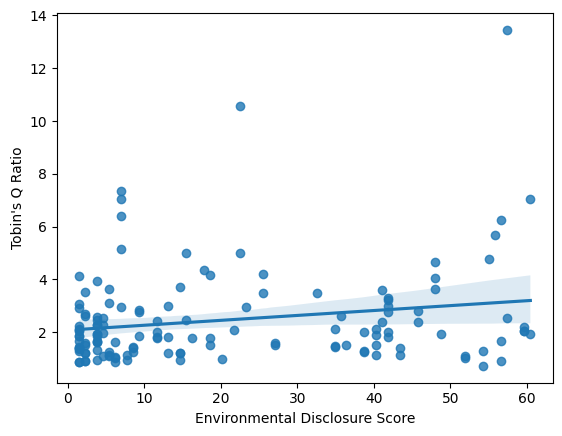

In [46]:
scatter, ax = plt.subplots()
ax = sns.regplot(y='Tobin\'s Q Ratio',x='Environmental Disclosure Score',data=compet_df)

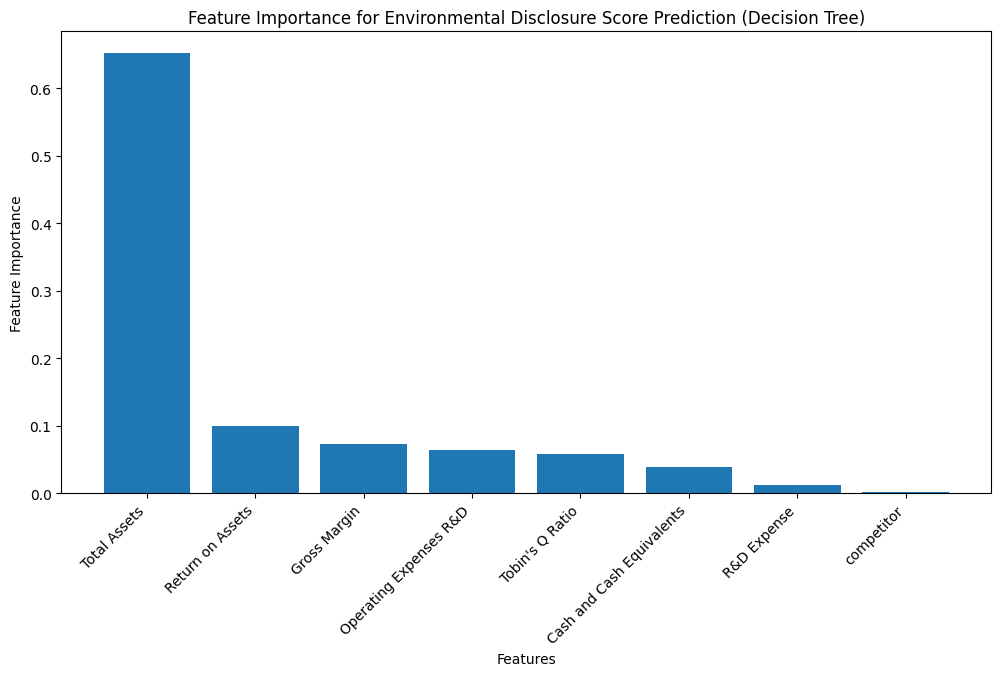

In [47]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Assuming 'X' is your feature matrix and 'y' is the target variable
X = compet_df[['Total Assets', 'R&D Expense', 'Gross Margin', "Tobin's Q Ratio", 'competitor',
                'Return on Assets', 'Operating Expenses R&D', 'Cash and Cash Equivalents']].dropna()
y = compet_df['Environmental Disclosure Score']

# Create a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)  # Setting a random seed for reproducibility

# Fit the model
dt_model.fit(X, y)

# Get feature importances
feature_importances = dt_model.feature_importances_

# Create a bar plot for feature importance with rotated x-axis labels
feature_names = X.columns
sorted_indices = feature_importances.argsort()[::-1]  # Sorting in descending order

plt.bar(feature_names[sorted_indices], feature_importances[sorted_indices])
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Environmental Disclosure Score Prediction (Decision Tree)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()



In [90]:
import statsmodels.formula.api as smf

# Assuming you want to change the column name to 'Env_Disclosure_Score'
com = compet_df[['Name', 'Year','Environmental Disclosure Score', 'Total Assets', 'Return on Assets', 'R&D Expense','Operating Expenses R&D','Cash and Cash Equivalents',"Tobin's Q Ratio",'Gross Margin' ]].copy()

com.rename(columns={'Environmental Disclosure Score': 'EDS', 'Total Assets':'TA', 'Return on Assets':'ROA','R&D Expense':'RDE','Cash and Cash Equivalents':'CCE','Operating Expenses R&D':'ORD',"Tobin's Q Ratio":'TQR','Gross Margin':'GM'}, inplace=True)

model = smf.ols(formula='RDE ~ TA + EDS + TA:EDS', data=com)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    RDE   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1089.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.19e-93
Time:                        16:18:35   Log-Likelihood:                -1011.8
No. Observations:                 137   AIC:                             2032.
Df Residuals:                     133   BIC:                             2043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.9873     53.090      0.791      0.4

In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = com[['TA', 'EDS']]

# Adding a constant column for the intercept term
X = sm.add_constant(X)

# Calculating VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


  Variable       VIF
0    const  2.132645
1       TA  1.222359
2      EDS  1.222359


In [50]:
compet_df.to_csv('/content/sample_data/compet.csv', index=False)

In [51]:
com.to_csv('/content/sample_data/com.csv', index=False)

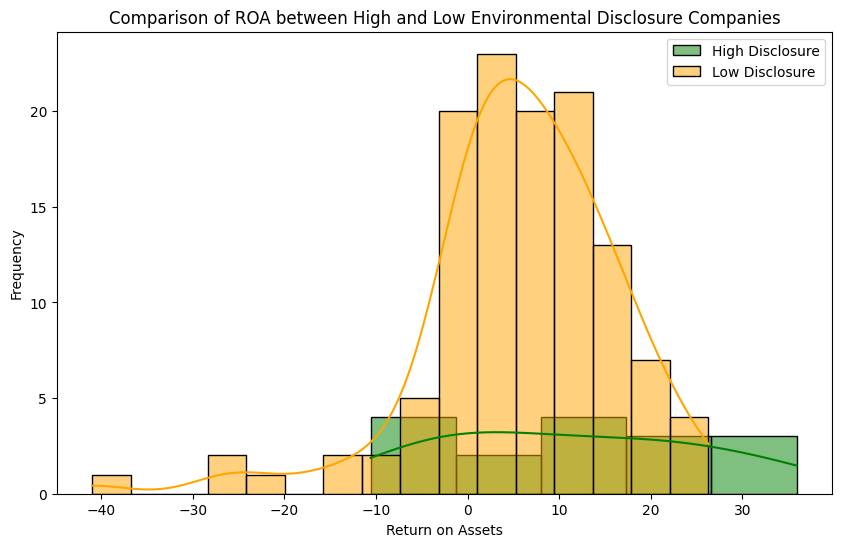

In [52]:
threshold = 50
high_disclosure = compet_df[compet_df['Environmental Disclosure Score'] >= threshold]
low_disclosure = compet_df[compet_df['Environmental Disclosure Score'] < threshold]

# Plotting the distributions of ROA for high and low disclosure groups
plt.figure(figsize=(10, 6))
sns.histplot(high_disclosure['Return on Assets'], color="green", label='High Disclosure', kde=True)
sns.histplot(low_disclosure['Return on Assets'], color="orange", label='Low Disclosure', kde=True)
plt.xlabel('Return on Assets')
plt.ylabel('Frequency')
plt.title('Comparison of ROA between High and Low Environmental Disclosure Companies')
plt.legend()
plt.show()

In [53]:
compet_df

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,...,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin,industry,Competitor Level,competitor
3,NXPI UW Equity,NXP Semiconductors NV,2016,NL0009538784,3674.0,453010,NL,40400.0,24898.000,1560.000,...,40.3101,28.0702,26.7857,1.8811,0.7805,1.7817,42.8406,electronic,Highly competitive,122
45,INTC UW Equity,Intel Corp,2016,US4581401001,3674.0,453010,US,106000.0,113327.000,12685.000,...,60.4651,43.8596,75.0000,1.9217,9.5345,16.0945,61.0117,electronic,Highly competitive,122
286,BHE UN Equity,Benchmark Electronics Inc,2016,US08160H1014,3672.0,452030,US,9900.0,1998.668,0.000,...,6.2016,14.0351,55.3571,1.0696,3.2908,4.7665,9.2392,electronic,Highly competitive,66
316,MU UW Equity,Micron Technology Inc,2016,US5951121038,3674.0,453010,US,31400.0,27540.000,1617.000,...,13.1783,33.3333,58.9286,1.2224,-1.0680,-2.2594,20.2032,electronic,Highly competitive,122
334,CRUS UW Equity,Cirrus Logic Inc,2016,US1727551004,3674.0,453010,US,1291.0,1181.883,269.217,...,1.5504,8.7719,55.3571,2.0994,10.6090,15.2983,47.4526,electronic,Highly competitive,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385,AMKR UW Equity,Amkor Technology Inc,2018,US0316521006,3674.0,453010,US,30850.0,4495.447,157.182,...,7.7519,3.5088,51.7857,0.9421,2.8231,7.2072,16.4617,electronic,Highly competitive,122
4449,SANM UW Equity,Sanmina Corp,2018,US8010561020,3672.0,452030,US,47000.0,4085.133,30.754,...,5.4264,8.7719,51.7857,1.0974,-2.4086,-6.1229,6.5228,electronic,Highly competitive,66
4461,FORM UW Equity,FormFactor Inc,2018,US3463751087,3674.0,453010,US,1676.0,728.222,74.976,...,3.8760,24.5614,51.7857,1.6297,15.1348,20.0300,39.7110,electronic,Highly competitive,122
4495,AAOI UQ Equity,Applied Optoelectronics Inc,2018,US03823U1025,3674.0,452010,US,2956.0,466.840,49.903,...,3.8760,3.5088,51.7857,0.9498,-0.4666,-0.6480,32.8166,electronic,Moderately competitive,39


In [102]:
df_new = compet_df.sort_values(by=['Name','Year'])

df_new['Lag_ROA'] = df_new.groupby('Name')['Return on Assets'].shift(1)
df_new['Lag_EDS'] = df_new.groupby('Name')['Environmental Disclosure Score'].shift(1)
df_new['Lag_TA'] = df_new.groupby('Name')['Total Assets'].shift(1)

df_new['Financial Growth'] = (df_new['Return on Assets'] - df_new['Lag_ROA'])
df_new['Environmental Growth'] = df_new['Environmental Disclosure Score'] - df_new['Lag_EDS']
df_new['Net_income'] = df_new['Financial Growth'] * (df_new['Lag_TA'] - df_new['Total Assets'])


sample_df = df_new[['Name','Year','Number of Employees','Total Assets','R&D Expense','Return on Assets','Return on Common Equity','Gross Margin','Financial Growth','Environmental Growth','Net_income','Operating Expenses R&D',"Tobin's Q Ratio",'Environmental Disclosure Score']].copy()
sample_df.head(5)

,Name,Year,Number of Employees,Total Assets,R&D Expense,Return on Assets,Return on Common Equity,Gross Margin,Financial Growth,Environmental Growth,Net_income,Operating Expenses R&D,Tobin's Q Ratio,Environmental Disclosure Score
844,Advanced Energy Industries Inc,2016,1558.0,571.529,44.445,24.6518,38.8784,52.3351,NaN,NaN,NaN,44.445,4.1182,1.5504
2350,Advanced Energy Industries Inc,2017,1876.0,733.308,57.999,21.1308,30.2090,53.1110,-3.5210,2.3256,569.623859,57.999,3.9344,3.8760
3856,Advanced Energy Industries Inc,2018,2259.0,816.484,76.008,18.9735,26.0814,50.8570,-2.1573,0.0000,179.435585,76.008,2.2635,3.8760
1250,Advanced Micro Devices Inc,2016,8900.0,3321.000,1008.000,-15.5504,NaN,23.2230,NaN,NaN,NaN,1008.000,4.0674,48.0620
2756,Advanced Micro Devices Inc,2017,8900.0,3552.000,1196.000,-0.9603,-6.5217,34.0187,14.5901,0.0000,-3370.313100,1196.000,3.6308,48.0620


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros


Training set R-squared: 1.0
Test set R-squared: 0.786726476524944


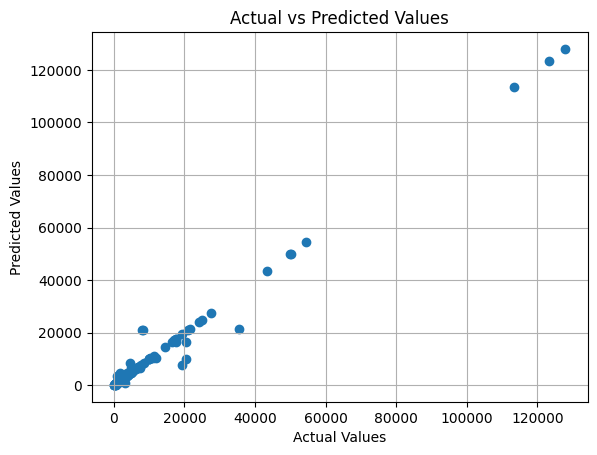

In [55]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor


y = compet_df['Total Assets']
X = compet_df[['Environmental Disclosure Score', 'R&D Expense', 'R&D Expense Adjusted', 'Operating Expenses R&D', 'Cash and Cash Equivalents',
               "Tobin's Q Ratio", 'Return on Assets', 'Gross Margin', 'competitor', 'Competitor Level',
               "Country or Territory of Domicile"]]
numeric_features = ['Environmental Disclosure Score', 'R&D Expense', 'R&D Expense Adjusted', 'Operating Expenses R&D',
                    'Cash and Cash Equivalents', "Tobin's Q Ratio", 'Return on Assets', 'Gross Margin']
categorical_features = ["Country or Territory of Domicile", 'Competitor Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False), categorical_features),
    ],
)
reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42)),  # Use DecisionTreeRegressor for regression
])


reg_pipeline.fit(X_train, y_train)

# Model evaluation on training and test sets for regression
print('Training set R-squared: ' + str(reg_pipeline.score(X_train, y_train)))
print('Test set R-squared: ' + str(reg_pipeline.score(X_test, y_test)))

y_pred = reg_pipeline.predict(X)
y_true = y.values

result = pd.DataFrame({'Actual': y_true, 'Predicted': y_pred})

plt.scatter(result['Actual'], result['Predicted'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names


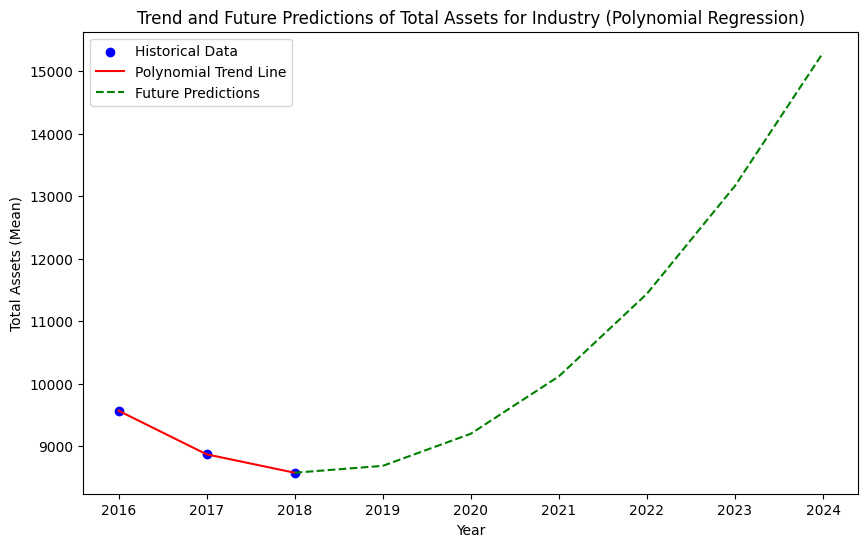

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


compet_df['Predicted Total Assets'] = y_pred
total_assets_yearly = compet_df.groupby('Year')['Total Assets'].mean().reset_index()

# Converting 'Year' to an integer format
total_assets_yearly['Year'] = total_assets_yearly['Year'].astype(np.int64)

# Model Training
X = total_assets_yearly[['Year']]
y = total_assets_yearly['Total Assets']

# Transforming the data into polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly.fit_transform(X)

# Fitting the linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predicting for the next few years (up to 2021 as an example)
future_years = np.array([[year] for year in range(2018, 2025)])  # Predicting for 2018-2021
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Historical Data')
plt.plot(X, model.predict(X_poly), color='red', label='Polynomial Trend Line')
plt.plot(future_years, future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.title('Trend and Future Predictions of Total Assets for Industry (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Total Assets (Mean)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


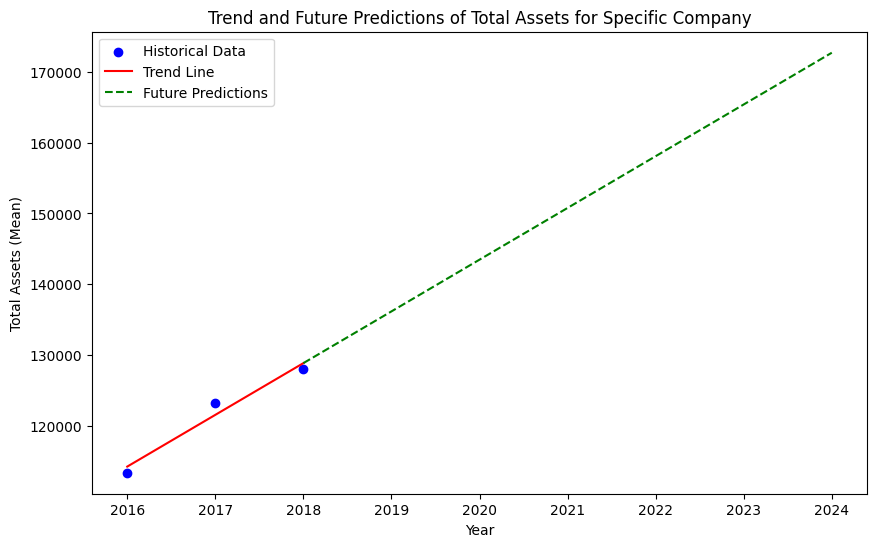

In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


Intel_corp = compet_df[compet_df['Name'] == 'Intel Corp']
# Assuming sample_df has data for the specific company for 2015, 2016, and 2017
total_assets_yearly = Intel_corp.groupby('Year')['Predicted Total Assets'].mean().reset_index()

# Converting 'Year' to an integer format
total_assets_yearly['Year'] = total_assets_yearly['Year'].astype(np.int64)

# Model Training
X = total_assets_yearly[['Year']]
y = total_assets_yearly['Predicted Total Assets']

model = LinearRegression()
model.fit(X, y)

# Predicting for the next few years (up to 2021 as an example)
future_years = np.array([[year] for year in range(2018, 2025)])  # Predicting for 2018-2021
future_predictions = model.predict(future_years)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Historical Data')
plt.plot(X, model.predict(X), color='red', label='Trend Line')
plt.plot(future_years, future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.title('Trend and Future Predictions of Total Assets for Specific Company')
plt.xlabel('Year')
plt.ylabel('Total Assets (Mean)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


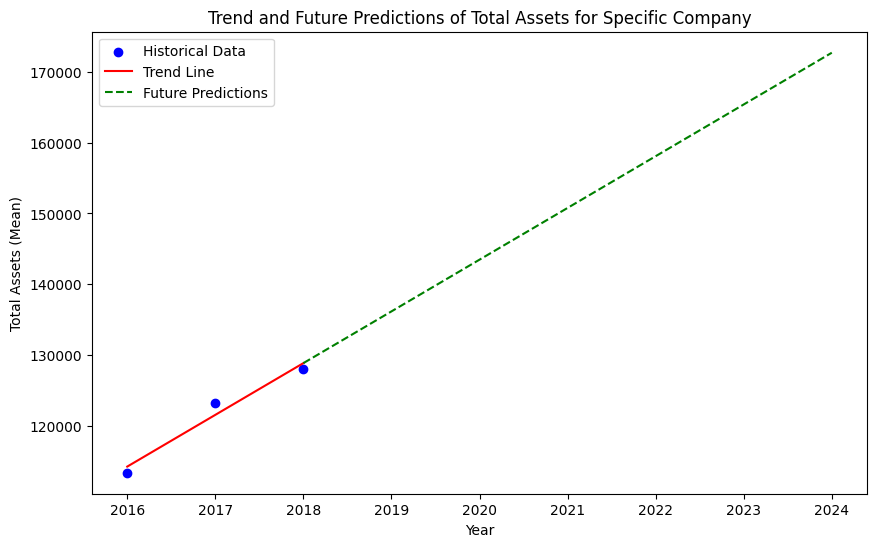

In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


Intel_corp = sample_df[sample_df['Name'] == 'Intel Corp']
# Assuming sample_df has data for the specific company for 2015, 2016, and 2017
total_assets_yearly = Intel_corp.groupby('Year')['Total Assets'].mean().reset_index()

# Converting 'Year' to an integer format
total_assets_yearly['Year'] = total_assets_yearly['Year'].astype(np.int64)

# Model Training
X = total_assets_yearly[['Year']]
y = total_assets_yearly['Total Assets']

model = LinearRegression()
model.fit(X, y)

# Predicting for the next few years (up to 2021 as an example)
future_years = np.array([[year] for year in range(2018, 2025)])  # Predicting for 2018-2021
future_predictions = model.predict(future_years)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Historical Data')
plt.plot(X, model.predict(X), color='red', label='Trend Line')
plt.plot(future_years, future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.title('Trend and Future Predictions of Total Assets for Specific Company')
plt.xlabel('Year')
plt.ylabel('Total Assets (Mean)')
plt.legend()
plt.show()


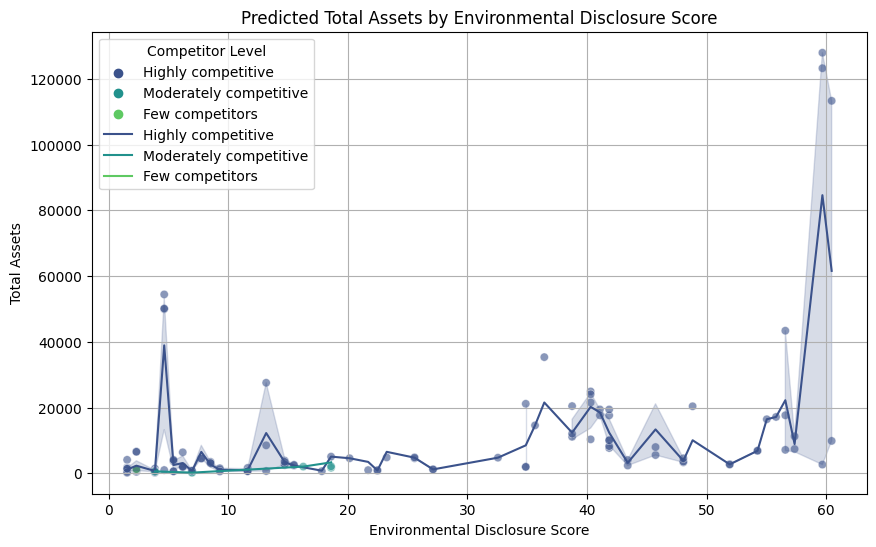

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

compet_df['Predicted Total Assets'] = y_pred
plt.figure(figsize=(10, 6))

# Actual Total Assets
sns.scatterplot(data=compet_df, x='Environmental Disclosure Score', y='Total Assets', hue='Competitor Level', palette='viridis', alpha=0.6)

# Predicted Total Assets as a smooth trend line
sns.lineplot(data=compet_df, x='Environmental Disclosure Score', y='Predicted Total Assets', hue='Competitor Level', palette='viridis')

plt.title('Predicted Total Assets by Environmental Disclosure Score')
plt.xlabel('Environmental Disclosure Score')
plt.ylabel('Total Assets')
plt.grid(True)
plt.show()



In [60]:
pip install linearmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.5 MB/s eta 0:00:00


In [124]:
import pandas as pd
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

cf = sample_df.set_index(['Name', 'Year'])


# Example: Predicting Return on Assets based on Environmental Disclosure Score
exog_vars = ['Environmental Disclosure Score','Total Assets']
exog = sm.add_constant(cf[exog_vars])
endog = cf['Return on Assets']

# Creating the model
model = PanelOLS(endog, exog, entity_effects=True)

results = model.fit()

# Viewing the results
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:       Return on Assets   R-squared:                        0.1011
Estimator:                   PanelOLS   R-squared (Between):             -2.2691
No. Observations:                 137   R-squared (Within):               0.1011
Date:                Wed, Dec 13 2023   R-squared (Overall):             -1.6495
Time:                        16:59:53   Log-likelihood                   -420.05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.7254
Entities:                          51   P-value                           0.0114
Avg Obs:                       2.6863   Distribution:                    F(2,84)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             4.7254
                            

In [132]:
cf['Interaction'] = cf['Environmental Disclosure Score'] * cf['Total Assets']

exog_vars = ['Environmental Disclosure Score', 'Interaction','Total Assets']
exog = sm.add_constant(cf[exog_vars])
model = PanelOLS(endog, exog, entity_effects=True)

results = model.fit()
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:       Return on Assets   R-squared:                        0.1831
Estimator:                   PanelOLS   R-squared (Between):             -1.5279
No. Observations:                 137   R-squared (Within):               0.1831
Date:                Wed, Dec 13 2023   R-squared (Overall):             -1.1321
Time:                        17:03:31   Log-likelihood                   -413.50
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      6.2004
Entities:                          51   P-value                           0.0007
Avg Obs:                       2.6863   Distribution:                    F(3,83)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             6.2004
                            

In [137]:
import pandas as pd
from linearmodels.panel import RandomEffects
import statsmodels.api as sm

cf = sample_df.set_index(['Name', 'Year'])

# Example: Predicting Return on Assets based on Environmental Disclosure Score
# and including other relevant variables and transformations
cf['Interaction'] = cf['Environmental Growth'] * cf['Total Assets']
# Add any other transformations or variables here

exog_vars = ['Environmental Growth', 'Total Assets','Interaction']
exog = sm.add_constant(cf[exog_vars])
endog = cf['Financial Growth']

# Creating the random effects model
model = RandomEffects(endog, exog)

results = model.fit()

# Viewing the results
print(results.summary)


                        RandomEffects Estimation Summary                        
Dep. Variable:       Financial Growth   R-squared:                        0.0986
Estimator:              RandomEffects   R-squared (Between):              0.1179
No. Observations:                  86   R-squared (Within):               0.0131
Date:                Wed, Dec 13 2023   R-squared (Overall):              0.1184
Time:                        17:11:41   Log-likelihood                   -286.53
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.9903
Entities:                          48   P-value                           0.0357
Avg Obs:                       1.7917   Distribution:                    F(3,82)
Min Obs:                       1.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             2.9190
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:2616: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.


In [62]:
intel_corp = compet_df[compet_df['Name']=='Intel Corp']
intel_corp = intel_corp[['Year','SIC Code','Number of Employees','Total Assets','R&D Expense',"Tobin's Q Ratio",'Return on Assets','Return on Common Equity','Gross Margin','competitor','R&D Expense Adjusted','Operating Expenses R&D','Cash and Cash Equivalents','Environmental Disclosure Score','Competitor Level']].copy()
intel_corp_2016 = intel_corp[intel_corp['Year'] == 2016]
intel_corp_2017 = intel_corp[intel_corp['Year'] == 2017]
intel_corp_2018 = intel_corp[intel_corp['Year'] == 2018]

In [63]:
import yfinance as yf
INTEL = yf.Ticker('INTC')
INTEL_2016 = INTEL.history(start='2016-01-01', end='2017-01-01', interval='1d')
INTEL_2017 = INTEL.history(start='2017-01-01', end='2018-01-01', interval='1d')
INTEL_2018 = INTEL.history(start='2018-01-01', end='2019-01-01', interval='1d')

columns_to_keep = ['Open', 'High', 'Low', 'Close', 'Volume']
INTEL_2016 = INTEL_2016[columns_to_keep]
INTEL_2017 = INTEL_2017[columns_to_keep]
INTEL_2018 = INTEL_2018[columns_to_keep]

INTEL_2016['Year'] = 2016
INTEL_2017['Year'] = 2017
INTEL_2018['Year'] = 2018

merged_2016 = pd.merge(INTEL_2016,intel_corp_2016,on = 'Year', how='left')
merged_2016 = merged_2016.drop(columns=['Year','SIC Code'])

merged_2017 = pd.merge(INTEL_2017,intel_corp_2017,on = 'Year', how='left')
merged_2017 = merged_2017.drop(columns=['Year','SIC Code'])

merged_2018 = pd.merge(INTEL_2018,intel_corp_2018,on = 'Year', how='left')
merged_2018 = merged_2018.drop(columns=['Year','SIC Code'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Training set R-squared: 1.0
Test set R-squared: 0.9928317150390971


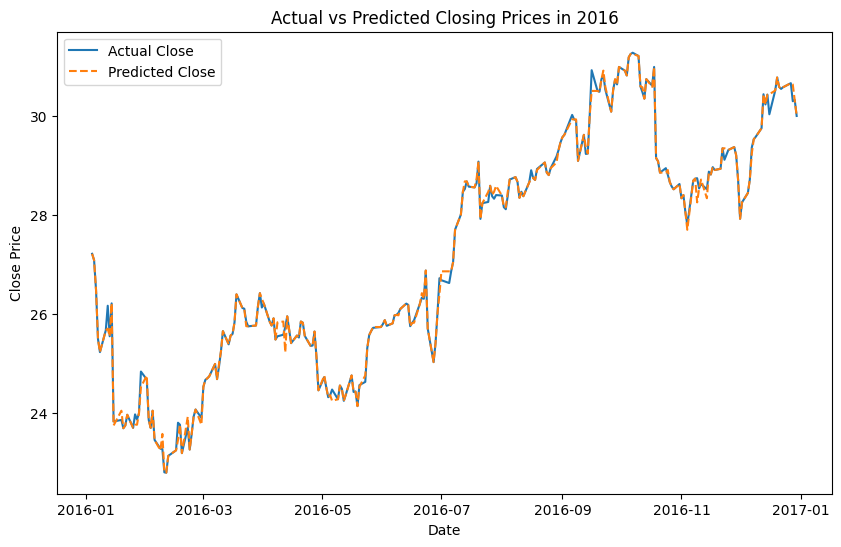

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor


y = merged_2016['Close']
X = merged_2016.drop(columns=['Close'])
numeric_features = ['Environmental Disclosure Score', 'R&D Expense', 'R&D Expense Adjusted', 'Operating Expenses R&D',
                    'Cash and Cash Equivalents', "Tobin's Q Ratio", 'Return on Assets', 'Gross Margin','Number of Employees','competitor','Return on Common Equity','Total Assets','Volume','Low','High','Open']
categorical_features = ['Competitor Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False), categorical_features),
    ],
)
reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42)),  # Use DecisionTreeRegressor for regression
])


reg_pipeline.fit(X_train, y_train)

# Model evaluation on training and test sets for regression
print('Training set R-squared: ' + str(reg_pipeline.score(X_train, y_train)))
print('Test set R-squared: ' + str(reg_pipeline.score(X_test, y_test)))

INTEL_2016['Predicted Close'] = reg_pipeline.predict(X)

pivot_actual = INTEL_2016.pivot_table(index='Date', values='Close')
pivot_predicted = INTEL_2016.pivot_table(index='Date', values='Predicted Close')

plt.figure(figsize=(10, 6))
plt.plot(pivot_actual, label='Actual Close')
plt.plot(pivot_predicted, label='Predicted Close', linestyle='--')
plt.title('Actual vs Predicted Closing Prices in 2016')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Training set R-squared: 1.0
Test set R-squared: 0.995154646298372


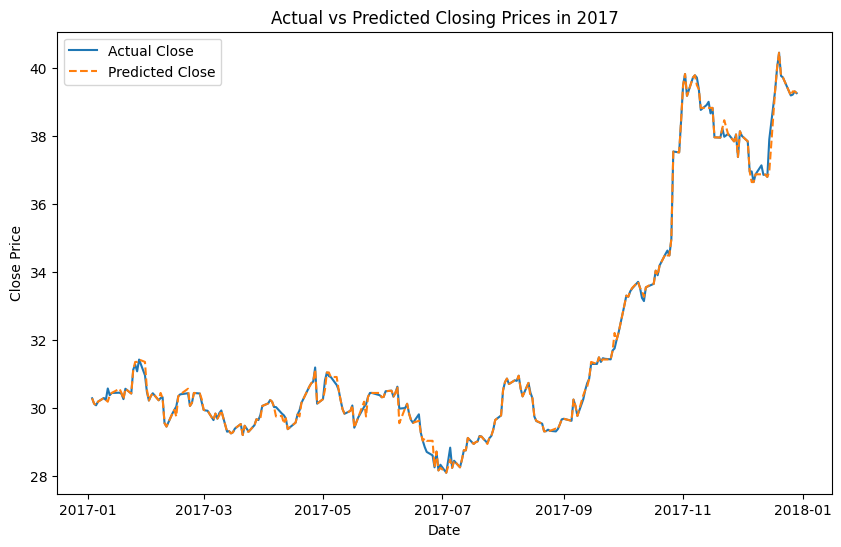

In [65]:
y = merged_2017['Close']
X = merged_2017.drop(columns=['Close'])
numeric_features = ['Environmental Disclosure Score', 'R&D Expense', 'R&D Expense Adjusted', 'Operating Expenses R&D',
                    'Cash and Cash Equivalents', "Tobin's Q Ratio", 'Return on Assets', 'Gross Margin','Number of Employees','competitor','Return on Common Equity','Total Assets','Volume','Low','High','Open']
categorical_features = ['Competitor Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False), categorical_features),
    ],
)
reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42)),  # Use DecisionTreeRegressor for regression
])


reg_pipeline.fit(X_train, y_train)

# Model evaluation on training and test sets for regression
print('Training set R-squared: ' + str(reg_pipeline.score(X_train, y_train)))
print('Test set R-squared: ' + str(reg_pipeline.score(X_test, y_test)))

INTEL_2017['Predicted Close'] = reg_pipeline.predict(X)

pivot_actual = INTEL_2017.pivot_table(index='Date', values='Close')
pivot_predicted = INTEL_2017.pivot_table(index='Date', values='Predicted Close')

plt.figure(figsize=(10, 6))
plt.plot(pivot_actual, label='Actual Close')
plt.plot(pivot_predicted, label='Predicted Close', linestyle='--')
plt.title('Actual vs Predicted Closing Prices in 2017')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Training set R-squared: 1.0
Test set R-squared: 0.9695662949274766


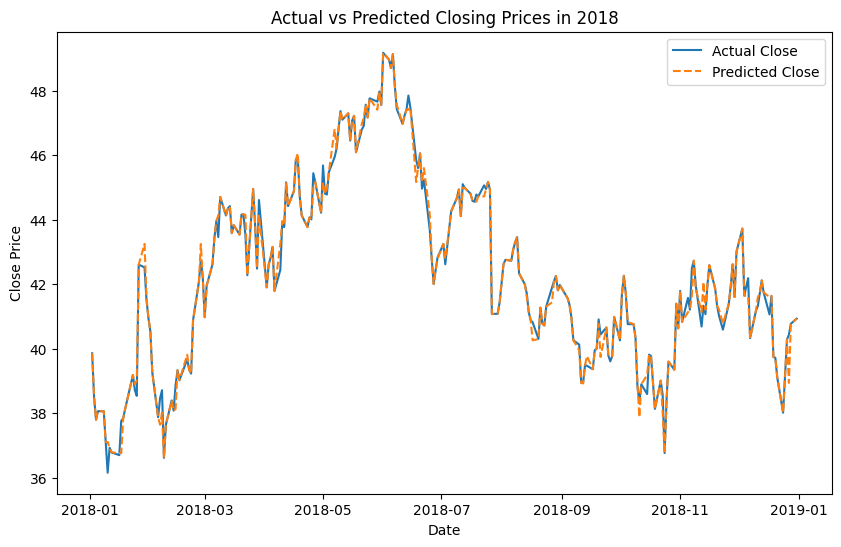

In [66]:
y = merged_2018['Close']
X = merged_2018.drop(columns=['Close'])
numeric_features = ['Environmental Disclosure Score', 'R&D Expense', 'R&D Expense Adjusted', 'Operating Expenses R&D',
                    'Cash and Cash Equivalents', "Tobin's Q Ratio", 'Return on Assets', 'Gross Margin','Number of Employees','competitor','Return on Common Equity','Total Assets','Volume','Low','High','Open']
categorical_features = ['Competitor Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False), categorical_features),
    ],
)
reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42)),  # Use DecisionTreeRegressor for regression
])


reg_pipeline.fit(X_train, y_train)

# Model evaluation on training and test sets for regression
print('Training set R-squared: ' + str(reg_pipeline.score(X_train, y_train)))
print('Test set R-squared: ' + str(reg_pipeline.score(X_test, y_test)))

INTEL_2018['Predicted Close'] = reg_pipeline.predict(X)

pivot_actual = INTEL_2018.pivot_table(index='Date', values='Close')
pivot_predicted = INTEL_2018.pivot_table(index='Date', values='Predicted Close')

plt.figure(figsize=(10, 6))
plt.plot(pivot_actual, label='Actual Close')
plt.plot(pivot_predicted, label='Predicted Close', linestyle='--')
plt.title('Actual vs Predicted Closing Prices in 2018')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [67]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load data from CSV
f = pd.read_csv('/content/1.csv', encoding='ISO-8859-1')

# Ensure the comments column is interpreted as a string
f['Comments'] = f['Comments'].astype(str)

# Function to analyze sentiment
def analyze_sentiment(comment):
    sentiment = TextBlob(comment).sentiment
    return sentiment.polarity, sentiment.subjectivity

# Apply the function to each comment
f[['Polarity', 'Subjectivity']] = f['Comments'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Optionally, classify tone as Positive, Negative, or Neutral based on Polarity
f['Tone'] = f['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

tone_counts = f['Tone'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
tone_counts.plot(kind='bar')
plt.title('Tone Distribution')
plt.xlabel('Tone')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

FileNotFoundError: ignored